## Deeper analysis on a enhanced dataset

Considering a greater statistics, the same analysis as the 287e is performed

Here the efficiency plots are provided

In [546]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import ultraplot as plot 


import uproot
import mplhep as hep
import hist
import hist.intervals
import hist.plot

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

plot.rc['cmap.levels'] = 4

data = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')
print(data.keys())

reco_true_cheated = data['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal = data['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated = data['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal = data['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated = data['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal = data['reco_nominal_reconstruction'].arrays(library='pd')


class Analysis:
    def __init__(self, data, binning=energy_bins_H, tree_bases=['reco_true_{}', 'reco_{}', 'true_{}']):
        self.binning = binning
        self.data = data

        self.reco_true_base_string, self.reco_base_string, self.true_base_string = tree_bases

    def efficiency(self, tree_name: str, variable: str = 'true_E'):

        reco_true = self.data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        true = self.data[self.true_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, true.event, on='event')
        
        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        true_H = hist.Hist(self.binning).fill(true[true.event.isin(common.event)][variable].values)

        reco_true_values = reco_true_H.values()
        true_values = true_H.values()
        
        with np.errstate(divide="ignore", invalid="ignore"):
            efficiency = reco_true_values/true_values
            efficiency_uncertainty = hist.intervals.ratio_uncertainty(
                reco_true_values, true_values, 'efficiency'
            )
        
        return efficiency, efficiency_uncertainty
    
    def purity(self, tree_name: str, variable: str = 'true_E'):
        
        reco_true = self.data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        reco = self.data[self.reco_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, reco.event, on='event')
        
        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        reco_H = hist.Hist(self.binning).fill(reco[reco.event.isin(common.event)][variable].values)

        reco_true_values = reco_true_H.values()
        reco_values = reco_H.values()
        
        with np.errstate(divide="ignore", invalid="ignore"):
            purity = reco_true_values/reco_values
            purity_uncertainty = hist.intervals.ratio_uncertainty(
                reco_true_values, reco_values, 'efficiency'
            )
        
        return purity, purity_uncertainty

    def spectra(self, tree_name: str, variable: str = 'true_E'):
        
        reco_true = self.data[self.reco_true_base_string.format(tree_name)].arrays(library='pd')
        reco = self.data[self.reco_base_string.format(tree_name)].arrays(library='pd')
        true = self.data[self.true_base_string.format(tree_name)].arrays(library='pd')

        common = pd.merge(reco_true.event, reco.event, on='event')
        common = pd.merge(common.event, true.event, on='event')

        reco_true_H = hist.Hist(self.binning).fill(reco_true[reco_true.event.isin(common.event)][variable].values)
        reco_H = hist.Hist(self.binning).fill(reco[reco.event.isin(common.event)][variable].values)
        true_H = hist.Hist(self.binning).fill(true[true.event.isin(common.event)][variable].values)

        return reco_true_H, reco_H, true_H



['POT;18', 'POT;17', 'POT;16', 'POT;15', 'POT;14', 'POT;13', 'POT;12', 'POT;11', 'POT;10', 'POT;9', 'POT;8', 'POT;7', 'POT;6', 'POT;5', 'POT;4', 'POT;3', 'POT;2', 'POT;1', 'Livetime;18', 'Livetime;17', 'Livetime;16', 'Livetime;15', 'Livetime;14', 'Livetime;13', 'Livetime;12', 'Livetime;11', 'Livetime;10', 'Livetime;9', 'Livetime;8', 'Livetime;7', 'Livetime;6', 'Livetime;5', 'Livetime;4', 'Livetime;3', 'Livetime;2', 'Livetime;1', 'reco_true_cheated_2D_Vtx_3D_Nu_Mva;1', 'reco_cheated_2D_Vtx_3D_Nu_Mva;1', 'true_cheated_2D_Vtx_3D_Nu_Mva;1', 'reco_true_cheated_2D_Vtx_3D_Nu;1', 'reco_cheated_2D_Vtx_3D_Nu;1', 'true_cheated_2D_Vtx_3D_Nu;1', 'reco_true_cheated_2D_Vtx_3D;1', 'reco_cheated_2D_Vtx_3D;1', 'true_cheated_2D_Vtx_3D;1', 'reco_true_cheated_2D_Vtx;1', 'reco_cheated_2D_Vtx;1', 'true_cheated_2D_Vtx;1', 'reco_true_cheated_2D;1', 'reco_cheated_2D;1', 'true_cheated_2D;1', 'reco_true_nominal_reconstruction;1', 'reco_nominal_reconstruction;1', 'true_nominal_reconstruction;1']


## Some events are not common...

Even if the new configuration would have helped, I probably mangled something while trying the configurations, so there are an excess of ~400 events, but this is just a fix

In [547]:
def check_commons(a, b):
    a, b = a.sort_values('event'), b.sort_values('event')
    common = pd.merge(a.event, b.event, on='event')
    print(f'Comparing we got {a.event.shape = } and {b.event.shape = } and {common.event.shape = }')
    print(f'{a[~a.event.isin(common.event)].event.shape = } and {b[~b.event.isin(common.event)].event.shape = }')

    # for eA, eB in zip(a[a.event.isin(common.event)].event, b[b.event.isin(common.event)].event):
    #     if eA != eB:
    #         print(f'{eA = }, {eB = }')

    return common

reco_true_common = check_commons(reco_true_cheated, reco_true_nominal)
reco_true_common = check_commons(reco_true_cheated, true_nominal)
reco_true_common = check_commons(reco_true_cheated, reco_nominal)

reco_true_common = check_commons(true_cheated, reco_true_nominal)
reco_true_common = check_commons(reco_cheated, reco_true_nominal)
true_common = check_commons(true_cheated, true_nominal)
reco_common = check_commons(reco_cheated, reco_nominal)

Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,)

Apparently no events are in excess (strange but probably handled by some cuts) so we have the full statistics

## Efficiency plots

Per valutare come cambia l'efficienza di ricostruzione. 

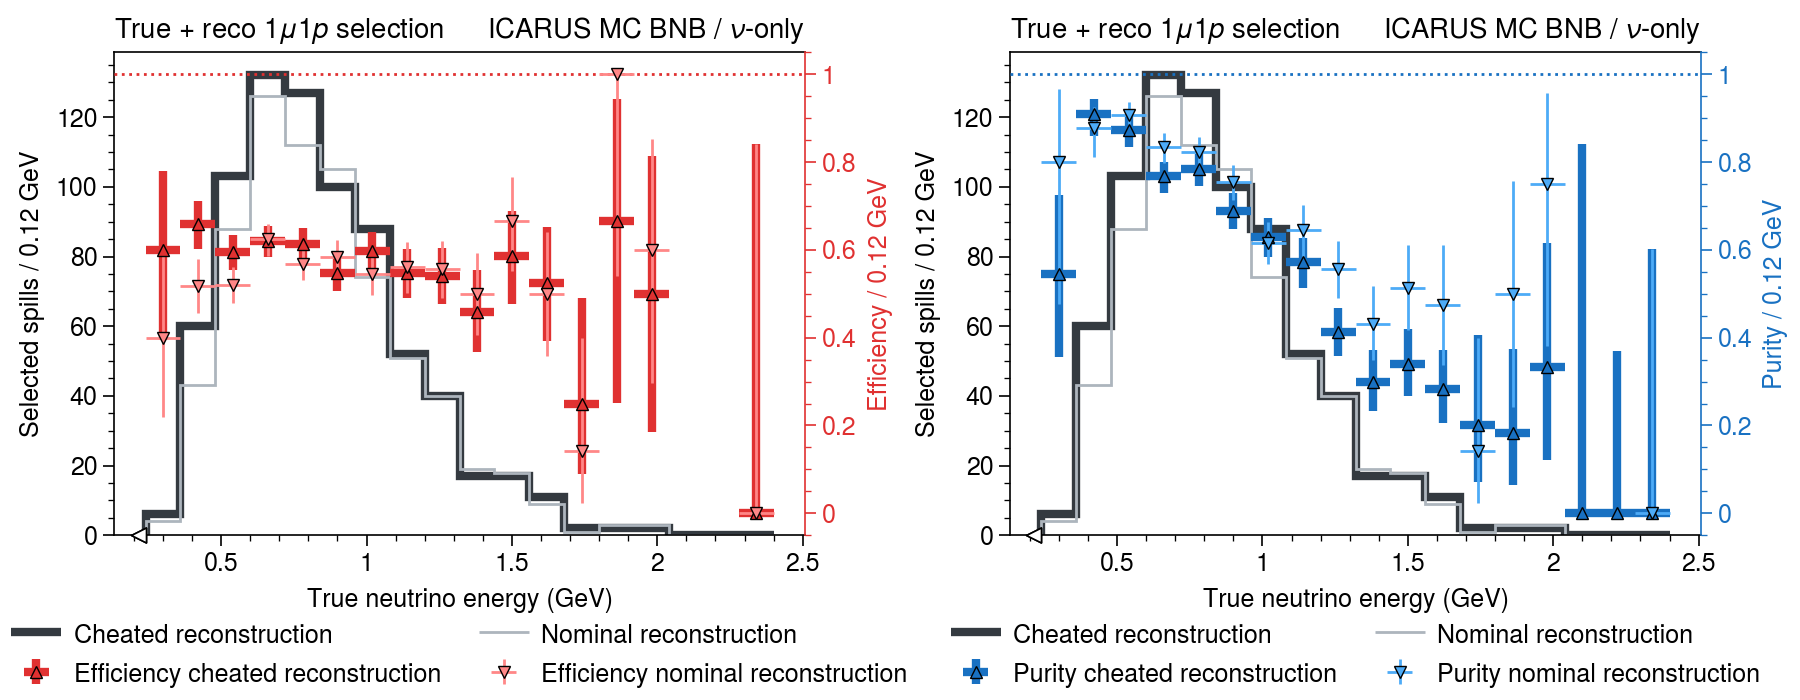

In [548]:

def efficiency_purity(reco_true, reco, true, bins=energy_bins_H):
    reco_true_H = hist.Hist(bins).fill(reco_true)
    reco_H = hist.Hist(bins).fill(reco)
    true_H = hist.Hist(bins).fill(true)

    hists = reco_true_H, reco_H, true_H

    reco_true_values = reco_true_H.values()
    reco_values = reco_H.values()
    true_values = true_H.values()

    with np.errstate(divide="ignore", invalid="ignore"):
        efficiency = reco_true_values/true_values
        purity = reco_true_values/reco_values

        err_efficiency = hist.intervals.ratio_uncertainty(reco_true_values, true_values, 'efficiency')
        err_purity = hist.intervals.ratio_uncertainty(reco_true_values, reco_values, 'efficiency')

        eff_ret = efficiency, err_efficiency
        pur_ret = purity, err_purity

    return hists, eff_ret, pur_ret

energy_bins_H = hist.axis.Regular(18, 0.24, 2.4, name='Energy (GeV)')

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'True neutrino energy (GeV)', ylabel=f'Selected spills / {energy_bins_H.widths[0]:.2f} GeV',  
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle='True + reco $1\\mu1p$ selection'# , yscale='log'
    # suptitle='Vertex differences'
)

hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.true_E.values, reco=reco_cheated.true_E.values, true=true_cheated.true_E.values, bins=energy_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.true_E.values, reco=reco_nominal.true_E.values, true=true_nominal.true_E.values, bins=energy_bins_H)

hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[0])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[0])
# hep.histplot(hists_cheated[2], yerr=False, color='gray8', lw=3, ls=':', label=r'Cheated reco. (true $1\mu1p$)', ax=ax[0])
# hep.histplot(hists_nominal[2], yerr=False, color='gray5', lw=1, ls=':', label=r'Nominal reco. (true $1\mu1p$)', ax=ax[0])

eff_ax = ax[0].alty(color='red8', label=f'Efficiency / {energy_bins_H.widths[0]:.2f} GeV')
eff_ax.axhline(1, color='red8', lw=1, ls=':')
eff_ax.errorbar(energy_bins_H.centers, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=energy_bins_H.widths[0]/2, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reconstruction')
eff_ax.errorbar(energy_bins_H.centers, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=energy_bins_H.widths[0]/2, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reconstruction')
eff_ax.legend(ncols=2, loc='b')

# hep.histplot(hists_cheated[1], yerr=False, color='gray8', lw=3, alpha=0.75, hatch=r'o', label=r'Cheated reco. (reco $1\mu1p$)', ax=ax[1])
# hep.histplot(hists_nominal[1], yerr=False, color='gray5', lw=1, alpha=0.75, hatch=r'OOO', label=r'Nominal reco. (reco $1\mu1p$)', ax=ax[1])
hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[1])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[1])

pur_ax = ax[1].alty(color='blue8', label=f'Purity / {energy_bins_H.widths[0]:.2f} GeV')
pur_ax.axhline(1, color='blue8', lw=1, ls=':')
pur_ax.errorbar(energy_bins_H.centers, purity_cheated[0], yerr=purity_cheated[1], xerr=energy_bins_H.widths[0]/2, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reconstruction')
pur_ax.errorbar(energy_bins_H.centers, purity_nominal[0], yerr=purity_nominal[1], xerr=energy_bins_H.widths[0]/2, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reconstruction')
pur_ax.legend(ncols=2, loc='b')

fig.savefig('efficiency_purity.pdf', bbox_inches='tight')

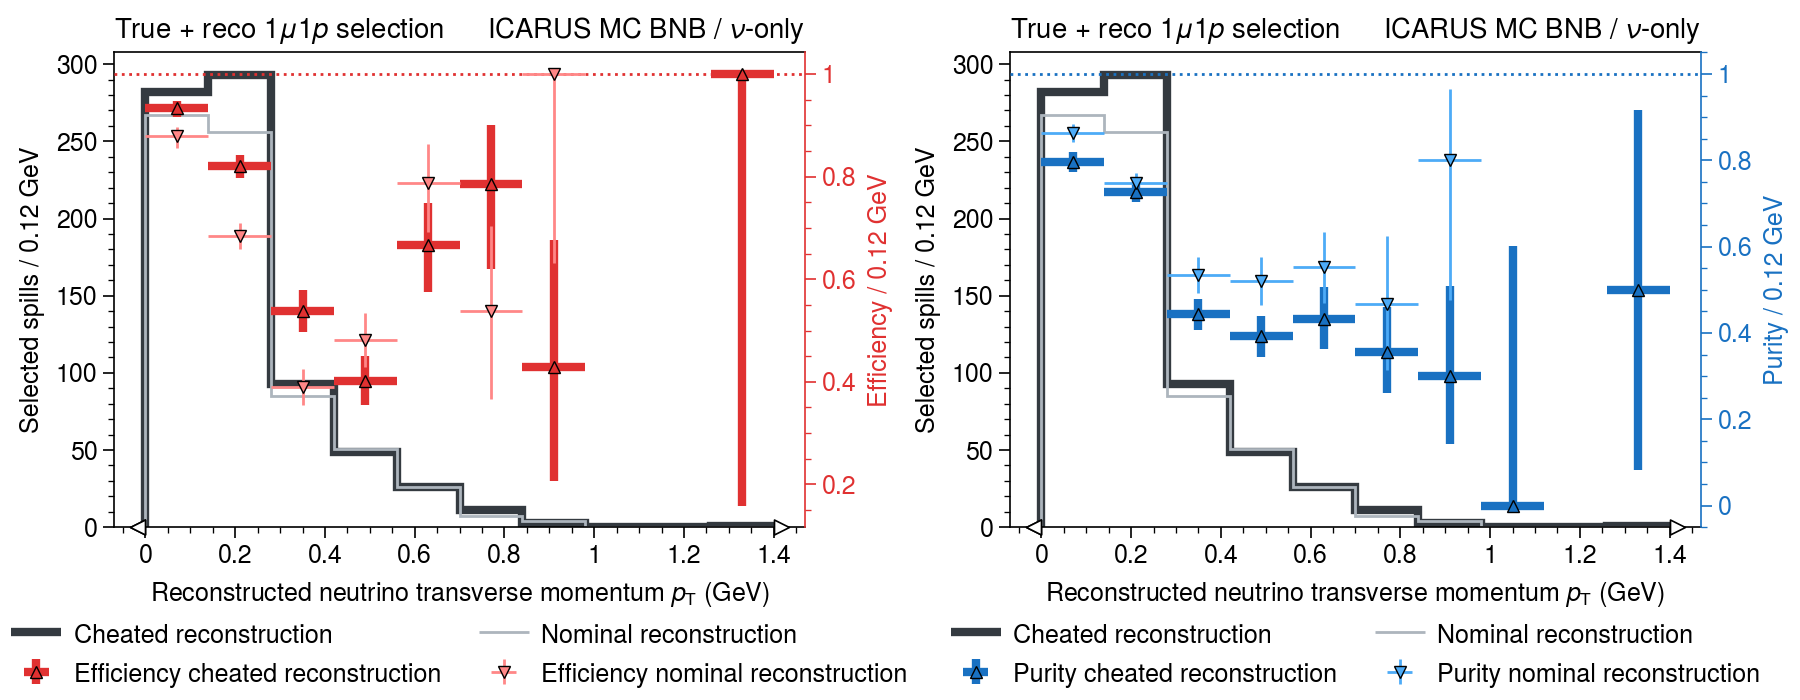

In [549]:
pT_bins_H = hist.axis.Regular(10, 0., 1.4, name='Energy (GeV)')
fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reconstructed neutrino transverse momentum $p_\text{T}$ (GeV)', ylabel=f'Selected spills / {energy_bins_H.widths[0]:.2f} GeV',  
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle='True + reco $1\\mu1p$ selection'# , yscale='log'
    # suptitle='Vertex differences'
)

hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.reco_pT.values, reco=reco_cheated.reco_pT.values, true=true_cheated.reco_pT.values, bins=pT_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.reco_pT.values, reco=reco_nominal.reco_pT.values, true=true_nominal.reco_pT.values, bins=pT_bins_H)

hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[0])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[0])
# hep.histplot(hists_cheated[2], yerr=False, color='gray8', lw=3, ls=':', label=r'Cheated reco. (true $1\mu1p$)', ax=ax[0])
# hep.histplot(hists_nominal[2], yerr=False, color='gray5', lw=1, ls=':', label=r'Nominal reco. (true $1\mu1p$)', ax=ax[0])

eff_ax = ax[0].alty(color='red8', label=f'Efficiency / {energy_bins_H.widths[0]:.2f} GeV')
eff_ax.axhline(1, color='red8', lw=1, ls=':')
eff_ax.errorbar(pT_bins_H.centers, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=pT_bins_H.widths[0]/2, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reconstruction')
eff_ax.errorbar(pT_bins_H.centers, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=pT_bins_H.widths[0]/2, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reconstruction')
eff_ax.legend(ncols=2, loc='b')

# hep.histplot(hists_cheated[1], yerr=False, color='gray8', lw=3, alpha=0.75, hatch=r'o', label=r'Cheated reco. (reco $1\mu1p$)', ax=ax[1])
# hep.histplot(hists_nominal[1], yerr=False, color='gray5', lw=1, alpha=0.75, hatch=r'OOO', label=r'Nominal reco. (reco $1\mu1p$)', ax=ax[1])
hep.histplot(hists_cheated[0], yerr=False, color='gray8', lw=3, label='Cheated reconstruction', ax=ax[1])
hep.histplot(hists_nominal[0], yerr=False, color='gray5', lw=1, label='Nominal reconstruction', ax=ax[1])

pur_ax = ax[1].alty(color='blue8', label=f'Purity / {energy_bins_H.widths[0]:.2f} GeV')
pur_ax.axhline(1, color='blue8', lw=1, ls=':')
pur_ax.errorbar(pT_bins_H.centers, purity_cheated[0], yerr=purity_cheated[1], xerr=pT_bins_H.widths[0]/2, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reconstruction')
pur_ax.errorbar(pT_bins_H.centers, purity_nominal[0], yerr=purity_nominal[1], xerr=pT_bins_H.widths[0]/2, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reconstruction')
pur_ax.legend(ncols=2, loc='b')

fig.savefig('efficiency_purity_reco_pT.pdf', bbox_inches='tight')

# 1µ1p Efficiency nominal/cheated reconstruction

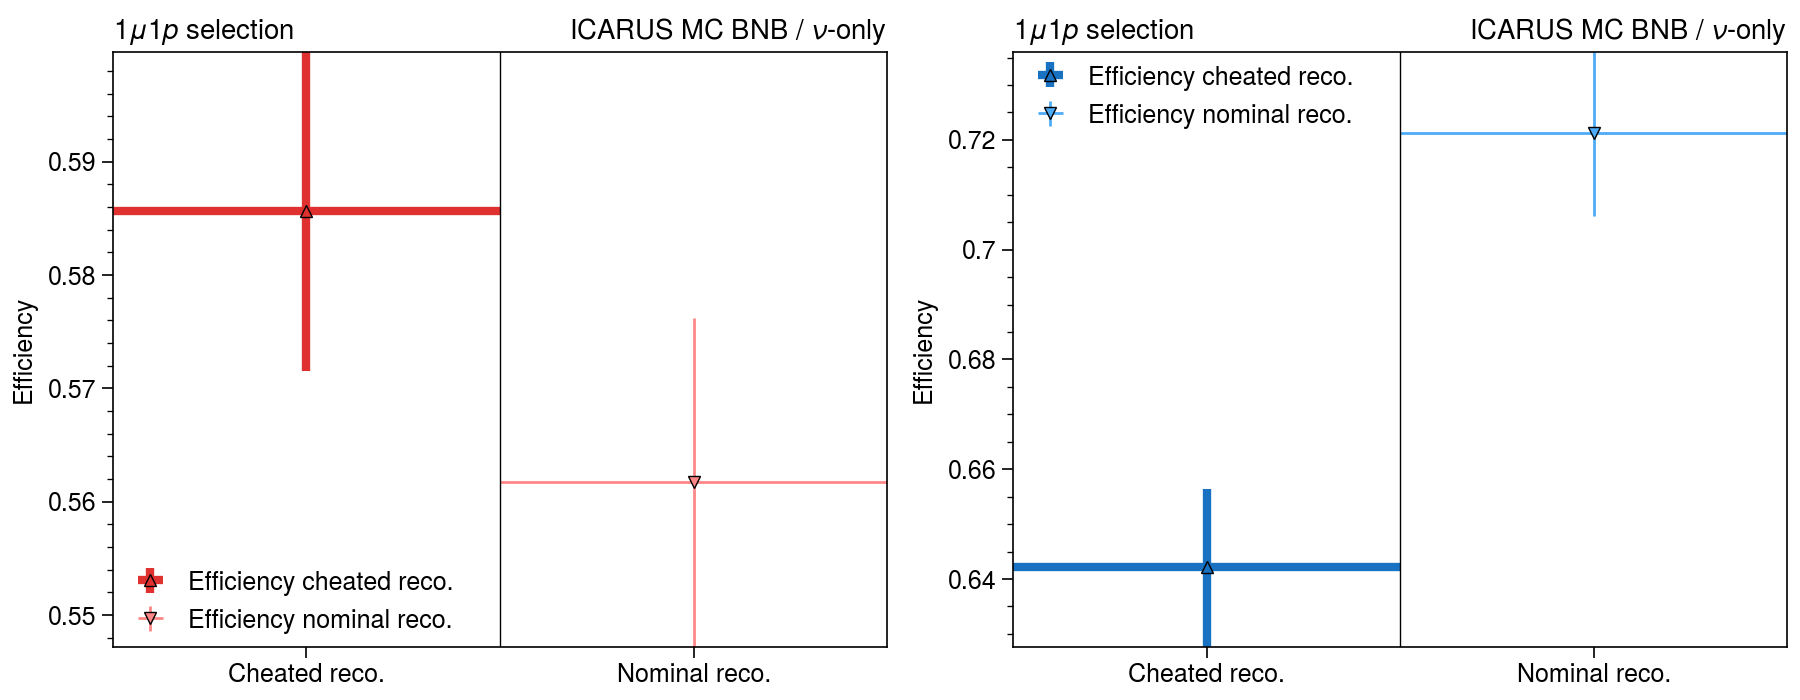

In [550]:

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle=r'$1\mu1p$ selection'# , yscale='log'
)

data = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')

reco_true_cheated = data['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal = data['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated = data['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal = data['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated = data['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal = data['reco_nominal_reconstruction'].arrays(library='pd')


energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')
hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(reco_true=reco_true_cheated.true_E.values, reco=reco_cheated.true_E.values, true=true_cheated.true_E.values, bins=energy_bins_H)
hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(reco_true=reco_true_nominal.true_E.values, reco=reco_nominal.true_E.values, true=true_nominal.true_E.values, bins=energy_bins_H)

ax[0].errorbar(1, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[0].errorbar(2, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[0].axvline(1.5, color='k', lw=0.5)
ax[0].legend(ncols=1, loc='ll')
ax[0].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])

ax[1].errorbar(1, purity_cheated[0], yerr=purity_cheated[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[1].errorbar(2, purity_nominal[0], yerr=purity_nominal[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[1].axvline(1.5, color='k', lw=0.5)
ax[1].legend(ncols=1, loc='ul')
ax[1].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])


## 1µNp Efficiency nominal/cheated reconstruction

Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)
Comparing we got a.event.shape = (19580,) and b.event.shape = (18585,) and common.event.shape = (19507,)
a[~a.event.isin(common.event)].event.shape = (161,) and b[~b.event.isin(common.event)].event.shape = (0,)


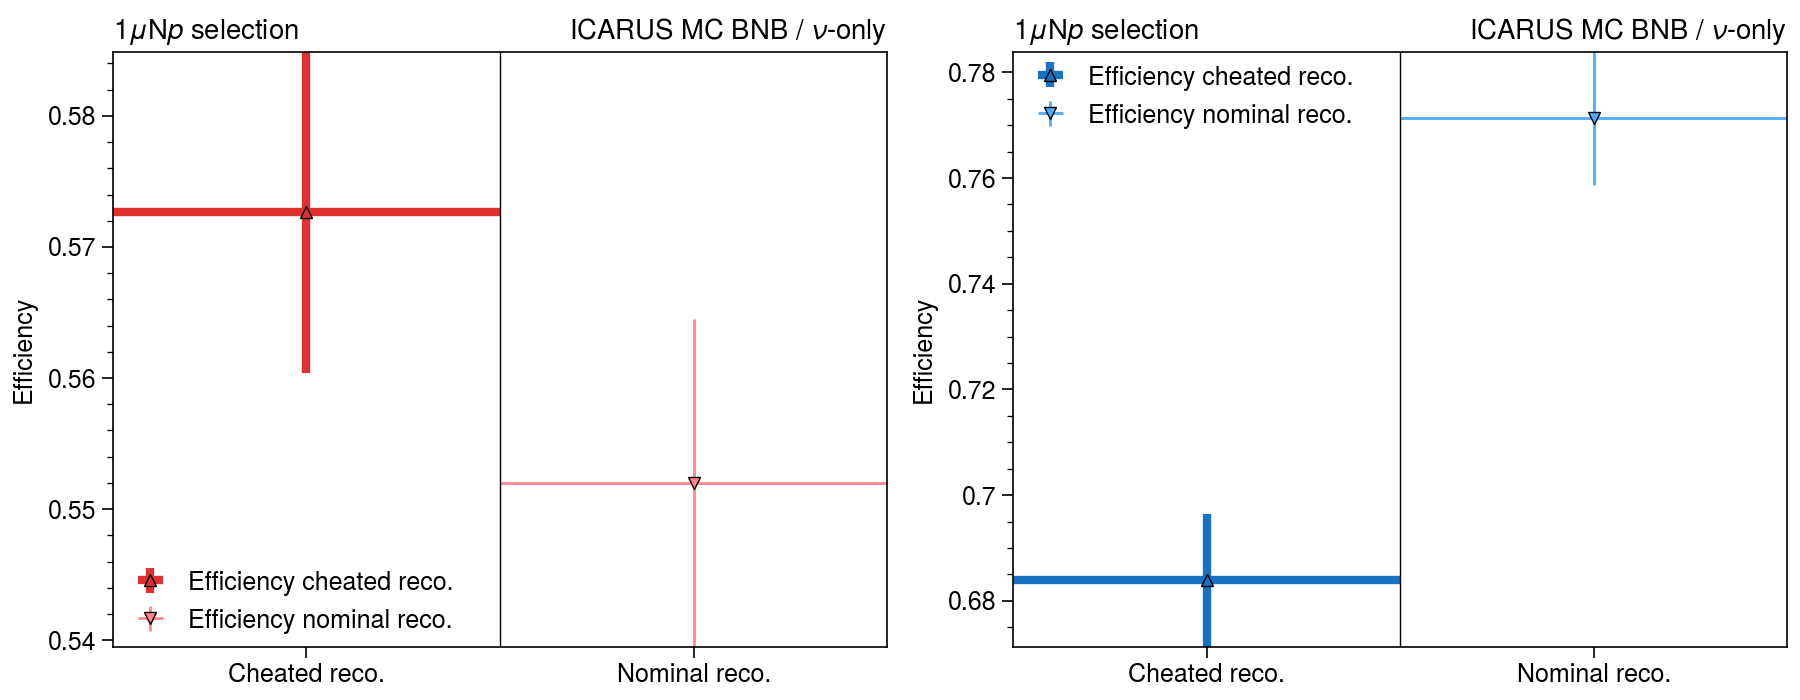

In [551]:
fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle=r'$1\mu \mathrm{N}p$ selection'# , yscale='log'
)

data = uproot.open('efficiency_plot_1uNp.root:efficiency_studies')

reco_true_cheated = data['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal = data['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated = data['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal = data['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated = data['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal = data['reco_nominal_reconstruction'].arrays(library='pd')

reco_true_common = check_commons(reco_true_cheated, reco_true_nominal)
true_common = check_commons(true_cheated, true_nominal)
reco_common = check_commons(reco_cheated, true_nominal)




energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')
hists_cheated, efficiency_cheated, purity_cheated = efficiency_purity(
    reco_true=reco_true_cheated[reco_true_cheated.event.isin(reco_true_common.event)].true_E.values, 
    reco=reco_cheated[reco_cheated.event.isin(reco_common.event)].true_E.values, 
    true=true_cheated[true_cheated.event.isin(true_common.event)].true_E.values, bins=energy_bins_H
)

hists_nominal, efficiency_nominal, purity_nominal = efficiency_purity(
    reco_true=reco_true_nominal[reco_true_nominal.event.isin(reco_true_common.event)].true_E.values, 
    reco=reco_nominal[reco_nominal.event.isin(reco_common.event)].true_E.values, 
    true=true_nominal[true_nominal.event.isin(true_common.event)].true_E.values, bins=energy_bins_H
)

ax[0].errorbar(1, efficiency_cheated[0], yerr=efficiency_cheated[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[0].errorbar(2, efficiency_nominal[0], yerr=efficiency_nominal[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[0].axvline(1.5, color='k', lw=0.5)
ax[0].legend(ncols=1, loc='ll')
ax[0].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])

ax[1].errorbar(1, purity_cheated[0], yerr=purity_cheated[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[1].errorbar(2, purity_nominal[0], yerr=purity_nominal[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[1].axvline(1.5, color='k', lw=0.5)
ax[1].legend(ncols=1, loc='ul')
ax[1].format(xticks=[1, 2], xticklabels=['Cheated reco.', 'Nominal reco.'])

## BOTH

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_90869/3584276786.py:37: UltraPlotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  ax.set_title('Preliminary', color='k', loc='left', weight='bold')


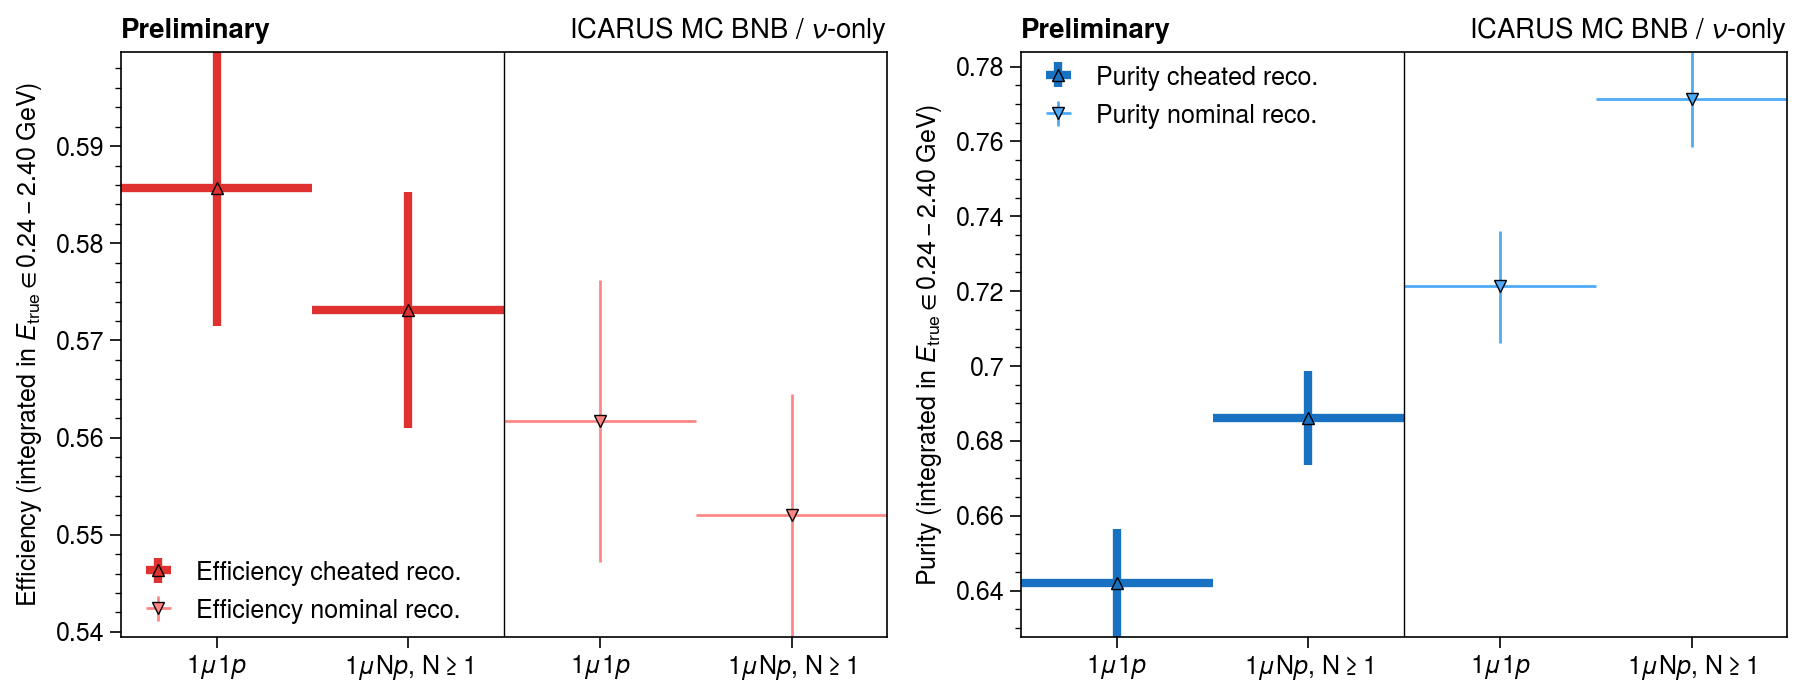

In [552]:

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, ylabel=f'Efficiency (integrated in $E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV)',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', xticks=[0.5, 1.5, 2.5, 3.5], xticklabels=[r'$1\mu1p$', r'$1\mu\mathrm{N}p$, $\mathrm{N}\geq1$', r'$1\mu1p$', r'$1\mu\mathrm{N}p$, $\mathrm{N}\geq1$'],
    # ltitle=r'$1\mu \mathrm{N}p$ selection'# , yscale='log'
)

energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')

data_1u1p = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')
data_1uNp = uproot.open('efficiency_plot_1uNp.root:efficiency_studies')

reco_true_cheated_1u1p = data_1u1p['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal_1u1p = data_1u1p['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated_1u1p = data_1u1p['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal_1u1p = data_1u1p['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated_1u1p = data_1u1p['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal_1u1p = data_1u1p['reco_nominal_reconstruction'].arrays(library='pd')

hists_cheated_1u1p, efficiency_cheated_1u1p, purity_cheated_1u1p = efficiency_purity(reco_true=reco_true_cheated_1u1p.true_E.values, reco=reco_cheated_1u1p.true_E.values, true=true_cheated_1u1p.true_E.values, bins=energy_bins_H)
hists_nominal_1u1p, efficiency_nominal_1u1p, purity_nominal_1u1p = efficiency_purity(reco_true=reco_true_nominal_1u1p.true_E.values, reco=reco_nominal_1u1p.true_E.values, true=true_nominal_1u1p.true_E.values, bins=energy_bins_H)

reco_true_cheated_1uNp = data_1uNp['reco_true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_true_nominal_1uNp = data_1uNp['reco_true_nominal_reconstruction'].arrays(library='pd')

true_cheated_1uNp = data_1uNp['true_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
true_nominal_1uNp = data_1uNp['true_nominal_reconstruction'].arrays(library='pd')

reco_cheated_1uNp = data_1uNp['reco_cheated_2D_Vtx_3D_Nu_Mva'].arrays(library='pd')
reco_nominal_1uNp = data_1uNp['reco_nominal_reconstruction'].arrays(library='pd')

hists_cheated_1uNp, efficiency_cheated_1uNp, purity_cheated_1uNp = efficiency_purity(reco_true=reco_true_cheated_1uNp.true_E.values, reco=reco_cheated_1uNp.true_E.values, true=true_cheated_1uNp.true_E.values, bins=energy_bins_H)
hists_nominal_1uNp, efficiency_nominal_1uNp, purity_nominal_1uNp = efficiency_purity(reco_true=reco_true_nominal_1uNp.true_E.values, reco=reco_nominal_1uNp.true_E.values, true=true_nominal_1uNp.true_E.values, bins=energy_bins_H)

ax.set_title('Preliminary', color='k', loc='left', weight='bold')

ax[0].errorbar(0.5, efficiency_cheated_1u1p[0], yerr=efficiency_cheated_1u1p[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Efficiency cheated reco.')
ax[0].errorbar(1.5, efficiency_cheated_1uNp[0], yerr=efficiency_cheated_1uNp[1], xerr=0.5, color='red8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3)
ax[0].errorbar(2.5, efficiency_nominal_1u1p[0], yerr=efficiency_nominal_1u1p[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Efficiency nominal reco.')
ax[0].errorbar(3.5, efficiency_nominal_1uNp[0], yerr=efficiency_nominal_1uNp[1], xerr=0.5, color='red4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1)
ax[0].axvline(2, color='k', lw=0.5)
ax[0].legend(ncols=1, loc='ll')

ax[1].errorbar(0.5, purity_cheated_1u1p[0], yerr=purity_cheated_1u1p[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Purity cheated reco.')
ax[1].errorbar(1.5, purity_cheated_1uNp[0], yerr=purity_cheated_1uNp[1], xerr=0.5, color='blue8', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3)
ax[1].errorbar(2.5, purity_nominal_1u1p[0], yerr=purity_nominal_1u1p[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Purity nominal reco.')
ax[1].errorbar(3.5, purity_nominal_1uNp[0], yerr=purity_nominal_1uNp[1], xerr=0.5, color='blue4', fmt='v', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1)
ax[1].axvline(2, color='k', lw=0.5)
ax[1].legend(ncols=1, loc='ul')
ax[1].format(ylabel=f'Purity (integrated in $E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV)')


fig.savefig('efficiency_purity_1µ1p+1µNp.pdf', bbox_inches='tight')

# Cheating ladder 

We have the ability to perform the cheating process only on certain steps, so I can "cheat up to" a certain stage. So I can use this as to perform a study of what are the "best" and "worst" stages

## Easy selection 1µ1p

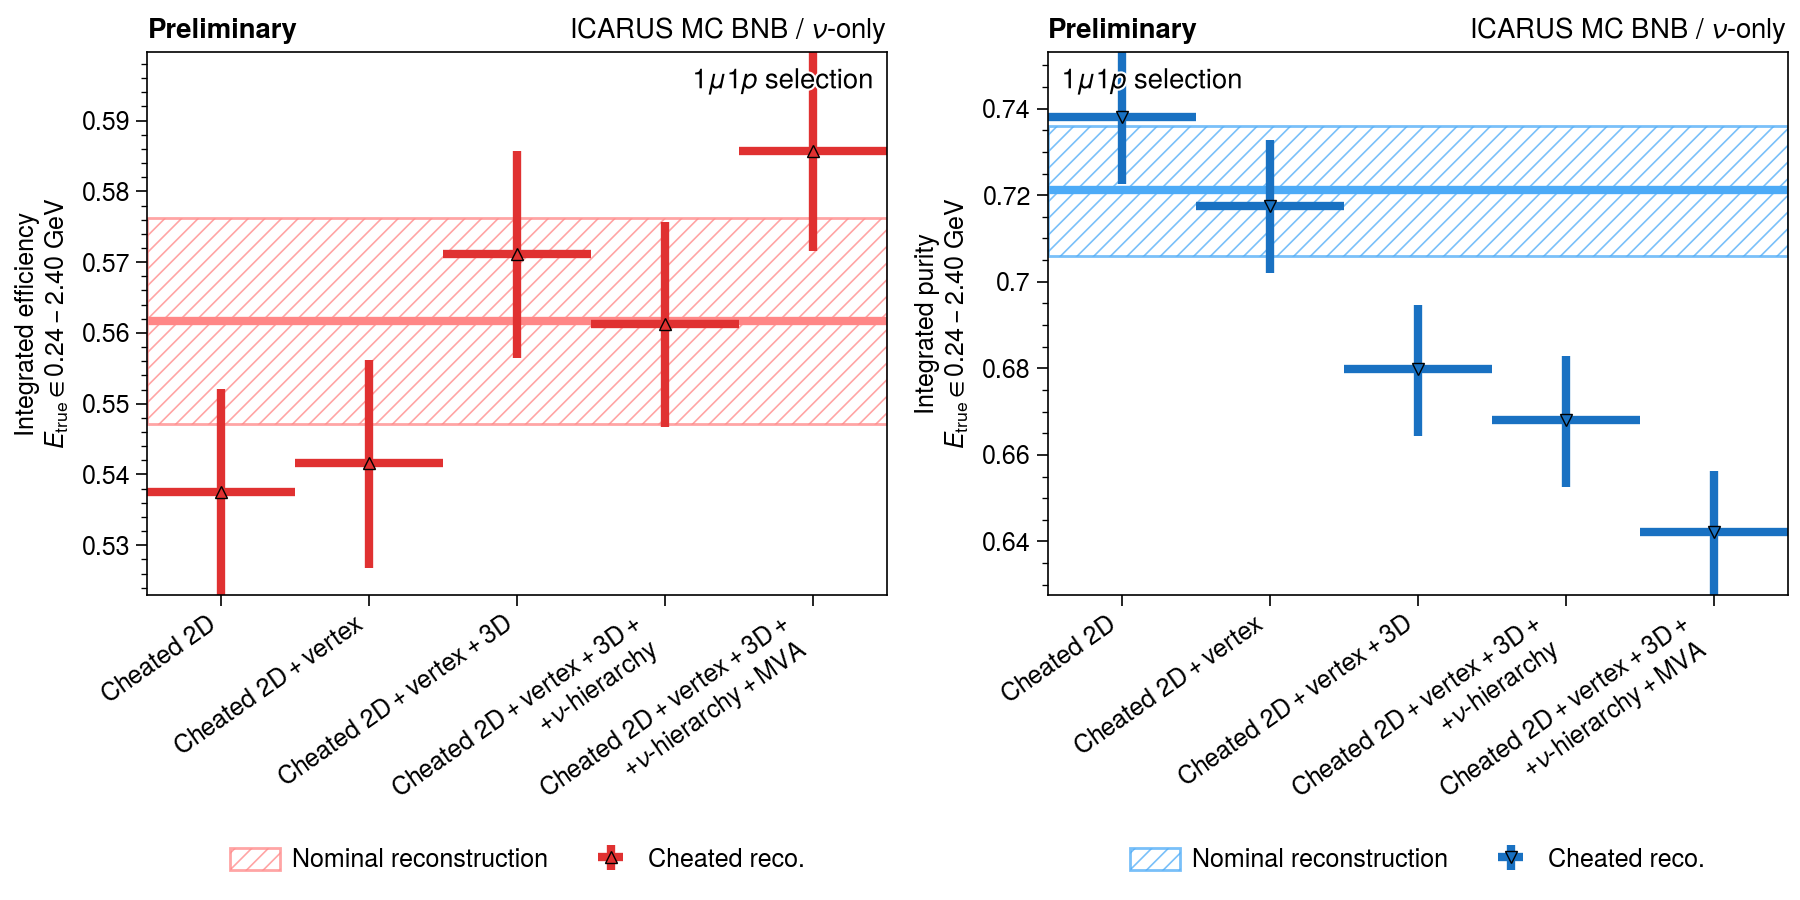

In [553]:

energy_bins_H = hist.axis.Regular(1, 0.24, 2.4, name='Energy (GeV)')

fig, ax = plot.subplots(
    width=9, height=4.5, ncols=2, nrows=1, ylabel=f'Integrated efficiency\n$E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Cheated $2\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    ],
    xrotation=35,
    urtitle=r'$1\mu1p$ selection'
    # , yscale='log'
)

data_1u1p = uproot.open('efficiency_plot_1u1p.root:efficiency_studies')
ax[1].format(ylabel=f'Integrated purity\n$E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV')


cheated_dict = {
    'xerr': 0.5, 
    'markersize': 4, 
    'mec': 'k', 
    'markeredgewidth': 0.5, 
    'capsize': 0, 
    'elinewidth': 3
}

trees = [
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

analysis_1u1p = Analysis(data=data_1u1p)

## NOMINAL RECO
efficiency, (low, high) = analysis_1u1p.efficiency('nominal_reconstruction')
ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch='////', fill=False, ec='red4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[0].axhline(efficiency, lw=3, c='red4')

purity, (low, high) = analysis_1u1p.purity('nominal_reconstruction')
ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch='////', fill=False, ec='blue4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[1].axhline(purity, lw=3, c='blue4')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1u1p.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1u1p.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(urtitle='', ultitle=r'$1\mu1p$ selection')
[axi.legend(loc='b') for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]

# fig.tight_layout()
fig.savefig('effciency_purity_ladder_plot_bottom_up_1u1p.pdf', bbox_inches='tight')

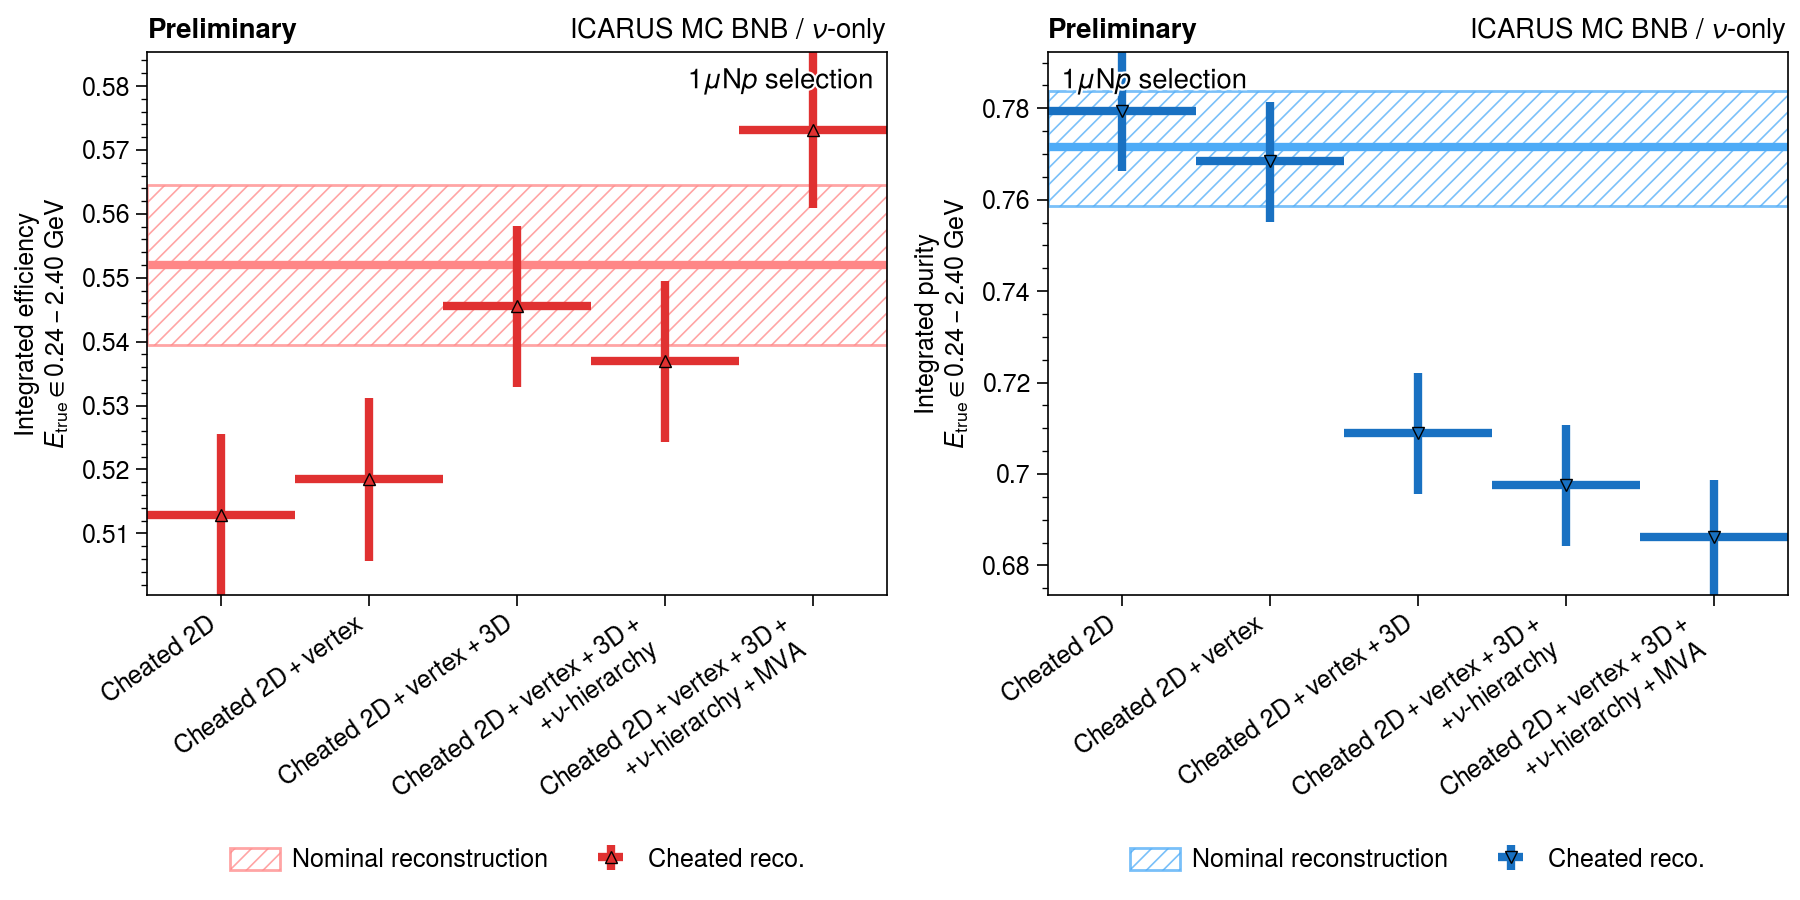

In [554]:

fig, ax = plot.subplots(
    width=9, height=4.5, ncols=2, nrows=1, ylabel=f'Integrated efficiency\n$E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Cheated $2\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$',  
    ],
    xrotation=35,
    urtitle=r'$1\mu\mathrm{N}p$ selection'
    # , yscale='log'
)

data_1uNp = uproot.open('efficiency_plot_1uNp.root:efficiency_studies')
analysis_1uNp = Analysis(data=data_1uNp)

## NOMINAL RECO
efficiency, (low, high) = analysis_1uNp.efficiency('nominal_reconstruction')
ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch='////', fill=False, ec='red4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[0].axhline(efficiency, lw=3, c='red4')

purity, (low, high) = analysis_1uNp.purity('nominal_reconstruction')
ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch='////', fill=False, ec='blue4', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[1].axhline(purity, lw=3, c='blue4')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1uNp.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1uNp.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(urtitle='', ultitle=r'$1\mu\mathrm{N}p$ selection')
[axi.legend(loc='b') for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]
ax[1].format(ylabel=f'Integrated purity\n$E_\\text{{true}}\\in{energy_bins_H.edges.min():.2f}-{energy_bins_H.edges.max():.2f}$ GeV')

fig.savefig('effciency_purity_ladder_plot_bottom_up_1uNp.pdf', bbox_inches='tight')

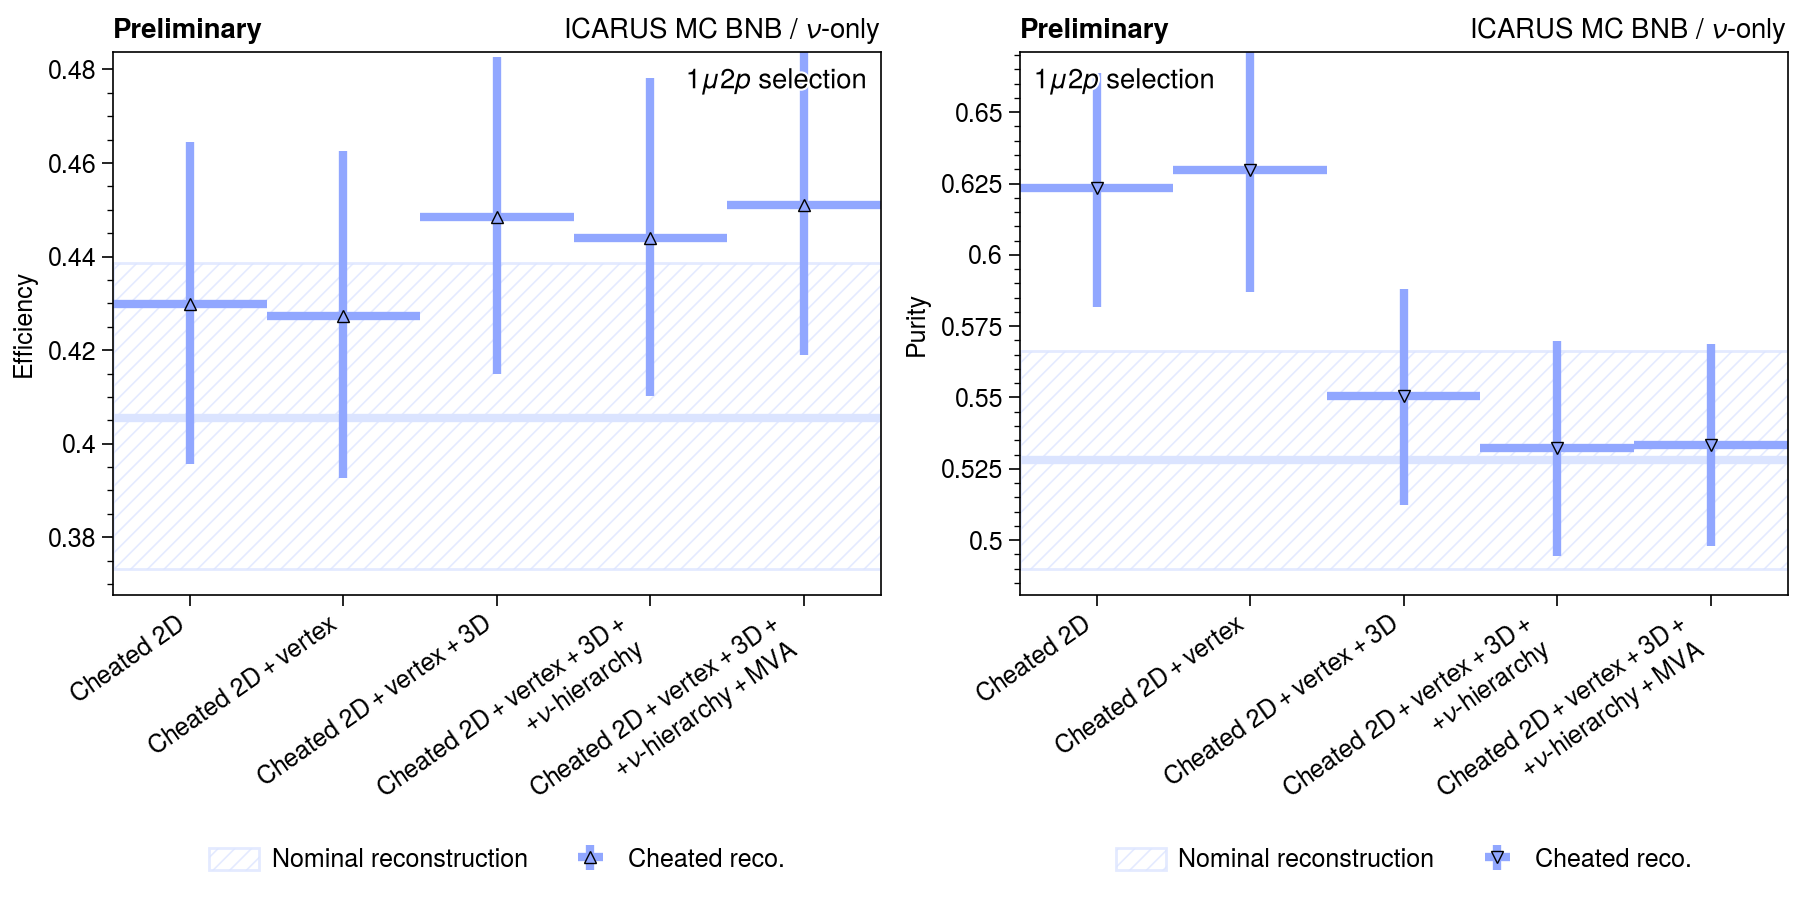

In [555]:
fig, ax = plot.subplots(
    width=9, height=4.5, ncols=2, nrows=1, ylabel=f'Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Cheated $2\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    ],
    xrotation=35,
    urtitle=r'$1\mu2p$ selection'
    # , yscale='log'
)

data_1u2p = uproot.open('efficiency_plot_1u2p.root:efficiency_studies')
analysis_1u2p = Analysis(data=data_1u2p)

## NOMINAL RECO
efficiency, (low, high) = analysis_1u2p.efficiency('nominal_reconstruction')
ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch='////', fill=False, ec='indigo1', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[0].axhline(efficiency, lw=3, c='indigo1')

purity, (low, high) = analysis_1u2p.purity('nominal_reconstruction')
ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch='////', fill=False, ec='indigo1', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[1].axhline(purity, lw=3, c='indigo1')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1u2p.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='indigo3', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1u2p.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='indigo3', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(urtitle='', ultitle=r'$1\mu2p$ selection')
[axi.legend(loc='b') for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]
ax[1].format(ylabel=f'Purity')

fig.savefig('effciency_purity_ladder_plot_bottom_up_1u2p.pdf', bbox_inches='tight')

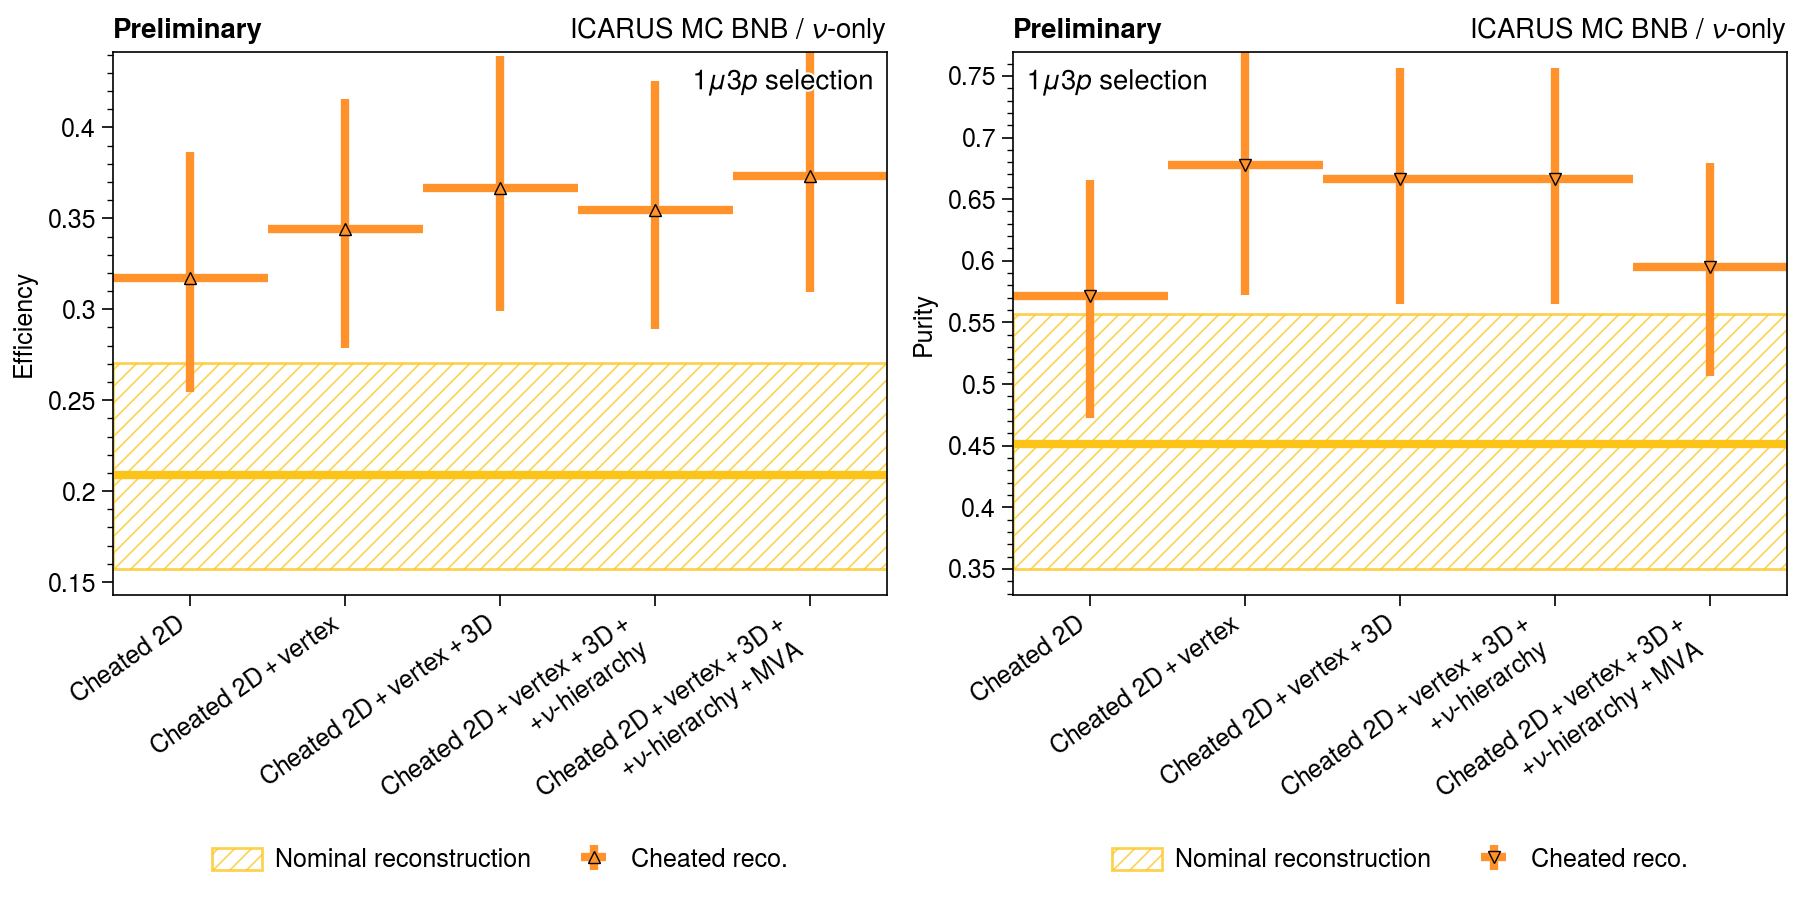

In [556]:
fig, ax = plot.subplots(
    width=9, height=4.5, ncols=2, nrows=1, ylabel=f'Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    xticks=[0.5, 1.5, 2.5, 3.5, 4.5], 
    xticklabels=[
        'Cheated $2\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    ],
    xrotation=35,
    urtitle=r'$1\mu3p$ selection'
    # , yscale='log'
)

data_1u3p = uproot.open('efficiency_plot_1u3p.root:efficiency_studies')
analysis_1u3p = Analysis(data=data_1u3p)

## NOMINAL RECO
efficiency, (low, high) = analysis_1u3p.efficiency('nominal_reconstruction')
ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], hatch='////', fill=False, ec='yellow5', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[0].axhline(efficiency, lw=3, c='yellow5')

purity, (low, high) = analysis_1u3p.purity('nominal_reconstruction')
ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], hatch='////', fill=False, ec='yellow5', alpha=0.75, linewidth=1, label='Nominal reconstruction')
ax[1].axhline(purity, lw=3, c='yellow5')

## LADDER 
for i, tree in enumerate(trees):
    efficiency, uncertainty = analysis_1u3p.efficiency(tree)
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='orange5', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis_1u3p.purity(tree)
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='orange5', fmt='v', label=('Cheated reco.' if i==0 else None))

ax[1].format(urtitle='', ultitle=r'$1\mu3p$ selection')
[axi.legend(loc='b') for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]
ax[1].format(ylabel=f'Purity')

fig.savefig('effciency_purity_ladder_plot_bottom_up_1u3p.pdf', bbox_inches='tight')

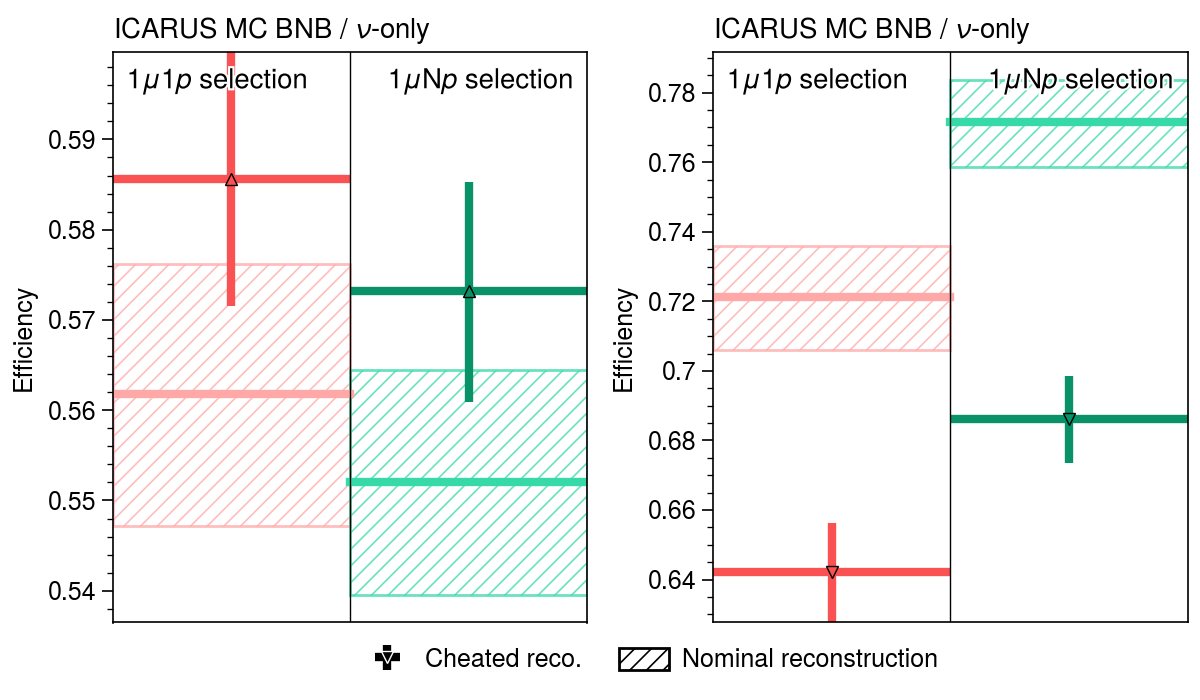

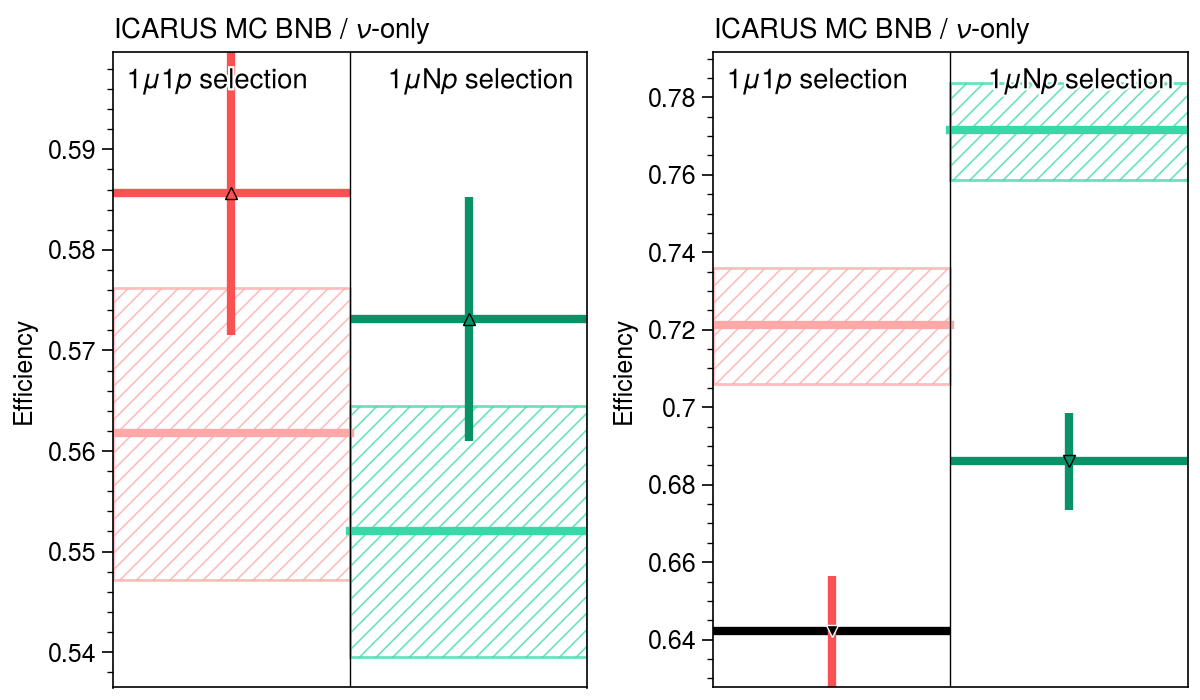

In [557]:

fig, ax = plot.subplots(
    width=6, height=3.5, ncols=2, nrows=1, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    ltitle='ICARUS MC BNB / $\\nu$-only', 
    ultitle=r'$1\mu1p$ selection',# , yscale='log'
    urtitle=r'$1\mu\mathrm{N}p$ selection'
)

for i, (analysis, xkeys, nominal_color, cheated_color) in enumerate(zip([analysis_1u1p, analysis_1uNp], [{'xmax': 0.5}, {'xmin': 0.5}], ['red3', 'teal4'], ['red6', 'teal8'])):
    
    ## NOMINAL RECO 1µ1p
    efficiency, (low, high) = analysis.efficiency('nominal_reconstruction')
    ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], **xkeys, hatch='////', fill=False, ec=nominal_color, alpha=0.75, linewidth=1, 
                  label=('Nominal reconstruction' if i==0 else None))
    ax[0].axhline(efficiency, **xkeys, lw=3, c=nominal_color)

    purity, (low, high) = analysis.purity('nominal_reconstruction')
    ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], **xkeys, hatch='////', fill=False, ec=nominal_color, alpha=0.75, linewidth=1) # , 
                  # label=('Nominal reconstruction' if i==0 else None))
    ax[1].axhline(purity, **xkeys, lw=3, c=nominal_color)


    efficiency, uncertainty = analysis.efficiency('cheated_2D_Vtx_3D_Nu_Mva')
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color=cheated_color, fmt='^') #, label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis.purity('cheated_2D_Vtx_3D_Nu_Mva')
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color=cheated_color, fmt='v', label=('Cheated reco.' if i==0 else None))

# [axi.legend(loc='b') for axi in ax]
[axi.axvline(1, color='k', lw=0.5) for axi in ax]
# [axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]
[axi.format(xticks=[]) for axi in ax]
# ax[1].format(ylabel=f'Purity', ylim=(0.625, 0.705))
# ax[0].format(ylim=(0.625, 0.735))

import copy
nominal_patch = mpl.patches.Patch(facecolor='none', edgecolor='k', hatch='////', linewidth=1, label='Nominal reconstruction')
cheated_marker = copy.deepcopy(ax[1].get_legend_handles_labels()[0][0])

cheated_marker.lines[0].set_mfc('k')
cheated_marker.lines[0].set_mec('white')
cheated_marker.lines[2][0].set_ec('k')


fig.legend(handles=[cheated_marker, nominal_patch], loc='b')
fig.savefig('efficiency_purity_1p+Np.pdf', bbox_inches='tight')

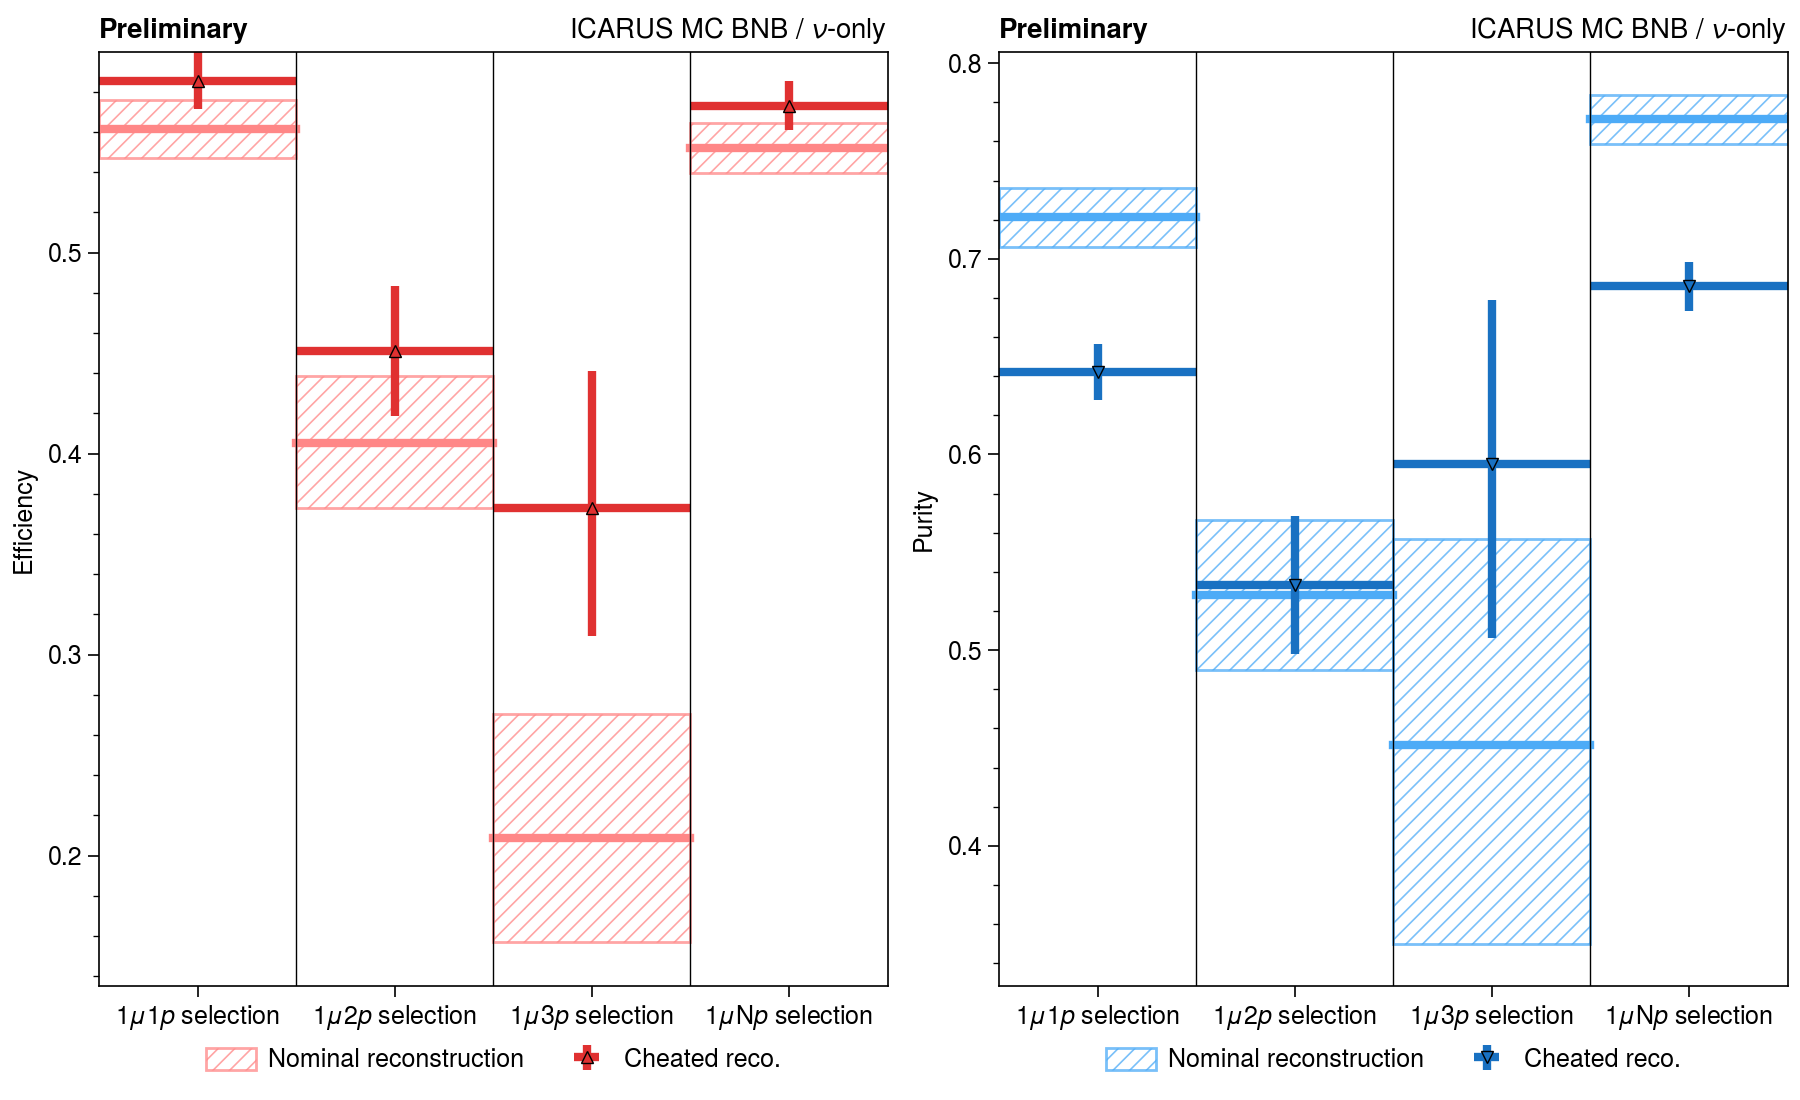

In [558]:

fig, ax = plot.subplots(
    width=9, height=5.5, ncols=2, nrows=1, ylabel='Efficiency',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    # ultitle=r'$1\mu1p$ selection',# , yscale='log'
    # urtitle=r'$1\mu\mathrm{N}p$ selection'
)

data_1u2p = uproot.open('efficiency_plot_1u2p.root:efficiency_studies')
analysis_1u2p = Analysis(data=data_1u2p)

data_1u3p = uproot.open('efficiency_plot_1u3p.root:efficiency_studies')
analysis_1u3p = Analysis(data=data_1u3p)

for i, (analysis, xkeys) in enumerate(zip([analysis_1u1p, analysis_1u2p, analysis_1u3p, analysis_1uNp], [{'xmax': 0.25}, {'xmin': 0.25, 'xmax': 0.5}, {'xmin': 0.5, 'xmax': 0.75}, {'xmin': 0.75}])):

    ## NOMINAL RECO 1µ1p
    efficiency, (low, high) = analysis.efficiency('nominal_reconstruction')
    ax[0].axhspan(ymin=(efficiency-low)[0], ymax=(efficiency+high)[0], **xkeys, hatch='////', fill=False, ec='red4', alpha=0.75, linewidth=1, 
                  label=('Nominal reconstruction' if i==0 else None))
    ax[0].axhline(efficiency, **xkeys, lw=3, c='red4')

    purity, (low, high) = analysis.purity('nominal_reconstruction')
    ax[1].axhspan(ymin=(purity-low)[0], ymax=(purity+high)[0], **xkeys, hatch='////', fill=False, ec='blue4', alpha=0.75, linewidth=1, 
                  label=('Nominal reconstruction' if i==0 else None))
    ax[1].axhline(purity, **xkeys, lw=3, c='blue4')


    efficiency, uncertainty = analysis.efficiency('cheated_2D_Vtx_3D_Nu_Mva')
    ax[0].errorbar(i+0.5, efficiency, yerr=uncertainty, **cheated_dict, color='red8', fmt='^', label=('Cheated reco.' if i==0 else None))

    purity, uncertainty = analysis.purity('cheated_2D_Vtx_3D_Nu_Mva')
    ax[1].errorbar(i+0.5, purity, yerr=uncertainty, **cheated_dict, color='blue8', fmt='v', label=('Cheated reco.' if i==0 else None))

[axi.legend(loc='b') for axi in ax]
[axi.axvline(1, color='k', lw=0.5) for axi in ax]
[axi.axvline(2, color='k', lw=0.5) for axi in ax]
[axi.axvline(3, color='k', lw=0.5) for axi in ax]
[axi.set_title('Preliminary', color='k', loc='left', weight='bold') for axi in ax]
[axi.format(xticks=[0.5, 1.5, 2.5, 3.5], xticklabels=[r'$1\mu1p$ selection', r'$1\mu2p$ selection', r'$1\mu3p$ selection', r'$1\mu\mathrm{N}p$ selection']) for axi in ax]
ax[1].format(ylabel=f'Purity') #, ylim=(0.625, 0.705))
# ax[0].format(ylim=(0.625, 0.735))



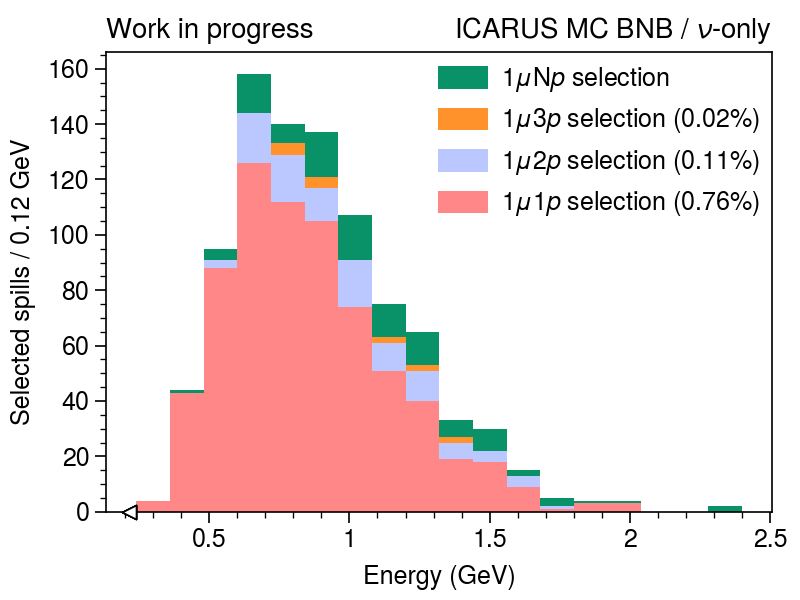

In [559]:
energy_bins = hist.axis.Regular(18, 0.24, 2.4, name='Energy (GeV)')

fig, ax = plot.subplots(
    width=4, height=3, ncols=1, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, # sharey='labs',
    rtitle='ICARUS MC BNB / $\\nu$-only', 
    ltitle='Work in progress'
)

true_E_Np = hist.Hist(energy_bins).fill(data_1uNp['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values)
true_E_1p = hist.Hist(energy_bins).fill(data_1u1p['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values)
true_E_2p = hist.Hist(energy_bins).fill(np.concat([
    data_1u2p['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values,
    data_1u1p['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values
]))
true_E_3p = hist.Hist(energy_bins).fill(np.concat([
    data_1u3p['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values,
    data_1u2p['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values,
    data_1u1p['reco_true_nominal_reconstruction'].arrays(library='pd').true_E.values
]))

Np_integral = true_E_Np.counts().sum()
only3p_integral = true_E_3p.counts().sum() - true_E_2p.counts().sum()
only2p_integral = true_E_2p.counts().sum() - true_E_1p.counts().sum()
only1p_integral = true_E_1p.counts().sum()


hep.histplot(true_E_Np, yerr=False, histtype='fill', color='teal8',   label=r'$1\mu \mathrm{N}p$ selection')
hep.histplot(true_E_3p, yerr=False, histtype='fill', color='orange5', label=f'$1\\mu3p$ selection ({only3p_integral / Np_integral:.2f}%)')
hep.histplot(true_E_2p, yerr=False, histtype='fill', color='indigo2',   label=f'$1\\mu2p$ selection ({only2p_integral / Np_integral:.2f}%)')
hep.histplot(true_E_1p, yerr=False, histtype='fill', color='red4', label=f'$1\\mu1p$ selection ({only1p_integral / Np_integral:.2f}%)')


ax.legend(ncols=1, loc='ur', facecolor='white', frameon=False)
fig.savefig('1µNp_+3p+2p+1p.pdf', bbox_inches='tight')

In [560]:

class Component:
    def __init__(self, data, binning, tree_base='reco_true_{}'):
        self.data = data
        self.binning = binning

        self.tree_base = tree_base

    def get(self, stage1, product, binning=None):
        if binning is not None:
            self.binning=binning
        data = self.data[self.tree_base.format(stage1)].arrays(library='pd')
        return hist.Hist(self.binning).fill(data[product].values)

    def keys(self, stage1):
        return self.data[self.tree_base.format(stage1)].keys()



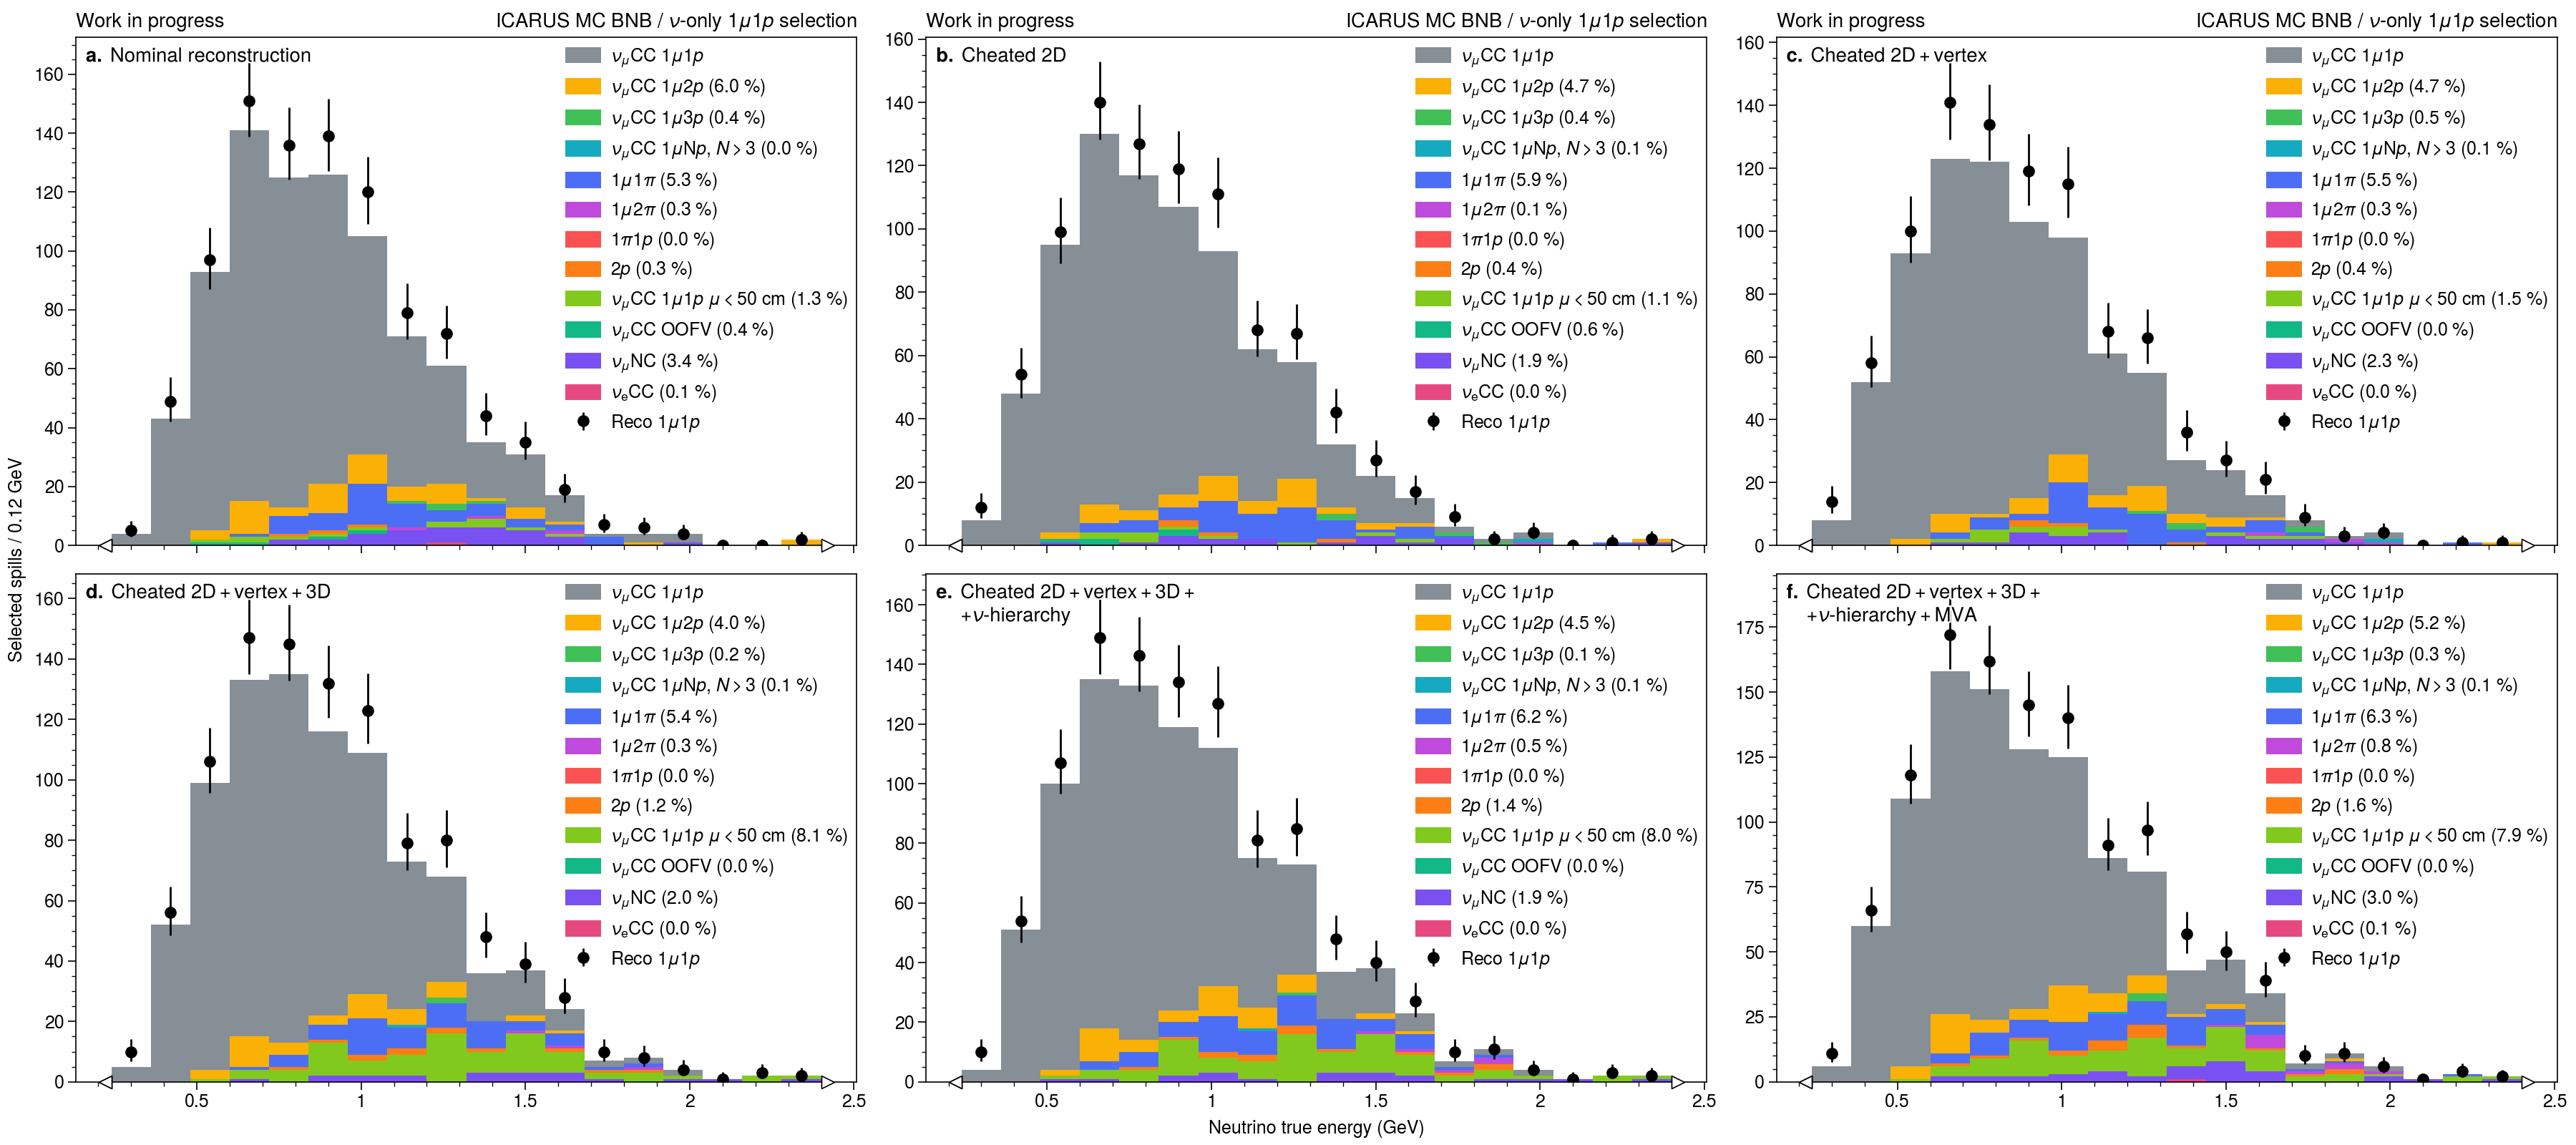

In [561]:
data_1u1p_components = uproot.open('pca_plot_1u1p.root:component_analysis')

analysis = Component(data=data_1u1p_components, binning=energy_bins)
analysis_reco = Component(data=data_1u1p, binning=energy_bins, tree_base='reco_{}')

fig, axs = plot.subplots(
    width=18, height=8, ncols=3, nrows=2, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Neutrino true energy (GeV)', abc='a.', abcloc='ul'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

cidx = 6

for ax, label in zip(axs, trees):
    selected_1u1p_count = analysis_reco.get(label, 'true_E').counts().sum()

    hep.histplot(analysis_reco.get(label, 'true_E'), capsize=0., histtype='errorbar', color='k', ax=ax, label=r'Reco $1\mu1p$')
    hep.histplot([
        # analysis.get(label, 'dirt_1mu1pNpi0'),
        # analysis.get(label, 'dirt_1mu1p1pi0'),
        analysis.get(label, 'nueCC'),
        analysis.get(label, 'numuNC'),
        analysis.get(label, 'numuCC_OOFV'),
        analysis.get(label, 'dirt_1muShortNp'),
        analysis.get(label, 'dirt_2p'),
        analysis.get(label, 'dirt_1pi1p'),
        # analysis.get(label, 'dirt_2mu'),
        # analysis.get(label, 'dirt_1mu3pi'),
        analysis.get(label, 'dirt_1mu2pi'),
        analysis.get(label, 'dirt_1mu1pi'),
        analysis.get(label, 'numuCC_Ngreater3p'),
        analysis.get(label, 'numuCC_3p'),
        analysis.get(label, 'numuCC_2p'),
        analysis.get(label, 'numuCC')
    ], stack=True, histtype='fill', ax=ax, label=[
        # f'$1\\mu1\\pi\\mathrm{{N}}\\pi^0$ ({analysis.get(label, 'dirt_1mu1pNpi0').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        # f'$1\\mu1\\pi1\\pi^0$ ({analysis.get(label, 'dirt_1mu1p1pi0').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        f'$\\nu_\\mathrm{{e}}\\mathrm{{CC}}$ ({analysis.get(label, 'nueCC').counts().sum()/selected_1u1p_count*100:.1f} %)',
        f'$\\nu_\\mu\\mathrm{{NC}}$ ({analysis.get(label, 'numuNC').counts().sum()/selected_1u1p_count*100:.1f} %)',
        f'$\\nu_\\mu\\mathrm{{CC}}$ OOFV ({analysis.get(label, 'numuCC_OOFV').counts().sum()/selected_1u1p_count*100:.1f} %)',
        f'$\\nu_\\mu\\mathrm{{CC}}$ $1\\mu1p$ $\\mu<50$ cm ({analysis.get(label, 'dirt_1muShortNp').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        f'$2p$ ({analysis.get(label, 'dirt_2p').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        f'$1\\pi1p$ ({analysis.get(label, 'dirt_1pi1p').counts().sum()/selected_1u1p_count*100:.1f} %)',
        # f'$2\\mu$ ({analysis.get(label, 'dirt_2mu').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        # f'$1\\mu3\\pi$ ({analysis.get(label, 'dirt_1mu3pi').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        f'$1\\mu2\\pi$ ({analysis.get(label, 'dirt_1mu2pi').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        f'$1\\mu1\\pi$ ({analysis.get(label, 'dirt_1mu1pi').counts().sum()/selected_1u1p_count*100:.1f} %)', 
        f'$\\nu_\\mu\\mathrm{{CC}}$ $1\\mu\\mathrm{{N}}p$, $N>3$ ({analysis.get(label, 'numuCC_Ngreater3p').counts().sum()/selected_1u1p_count*100:.1f} %)',
        f'$\\nu_\\mu\\mathrm{{CC}}$ $1\\mu3p$ ({analysis.get(label, 'numuCC_3p').counts().sum()/selected_1u1p_count*100:.1f} %)',
        f'$\\nu_\\mu\\mathrm{{CC}}$ $1\\mu2p$ ({analysis.get(label, 'numuCC_2p').counts().sum()/selected_1u1p_count*100:.1f} %)',
        r'$\nu_\mu\mathrm{CC}$ $1\mu1p$'
    ], color=[
        f'pink{cidx}',
        f'violet{cidx}',
        # f'blue{cidx}', ## TEMP to remove
        f'teal{cidx}',
        f'lime{cidx}',
        f'orange{cidx}',
        f'red{cidx}',
        f'grape{cidx}',
        f'indigo{cidx}',
        f'cyan{cidx}',
        f'green{cidx}',
        f'yellow{cidx}',
        f'gray{cidx}'
    ])

    # ax.format(yscale='log')
    ax.format(ultitle=trees_label[label])
    ax.legend(ncols=1, order='F', loc='ur') # , label=trees_label[label])



[axs[i].format(
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$ selection', 
    ltitle='Work in progress'
) for i in range(3)]

fig.savefig('component_analysis.pdf', bbox_inches='tight')

In [562]:
analysis.keys(label)

['event',
 'numuCC',
 'numuCC_2p',
 'numuCC_3p',
 'numuCC_Ngreater3p',
 'numuNC',
 'nueCC',
 'numuCC_OOFV',
 'genie_mode_QE',
 'genie_mode_Res',
 'genie_mode_DIS',
 'genie_mode_Coh',
 'genie_mode_CohElastic',
 'genie_mode_ElectronScattering',
 'genie_mode_IMDAnnihilation',
 'genie_mode_InverseBetaDecay',
 'genie_mode_GlashowResonance',
 'genie_mode_AMNuGamma',
 'genie_mode_MEC',
 'genie_mode_Diffractive',
 'genie_mode_EM',
 'genie_mode_WeakMix',
 'dirt_1mu1pi',
 'dirt_1mu2pi',
 'dirt_1mu3pi',
 'dirt_1muNpi',
 'dirt_2mu',
 'dirt_2p',
 'dirt_1pi1p',
 'dirt_1muShortNp',
 'dirt_1mu1p1pi0',
 'dirt_1mu1pNpi0']

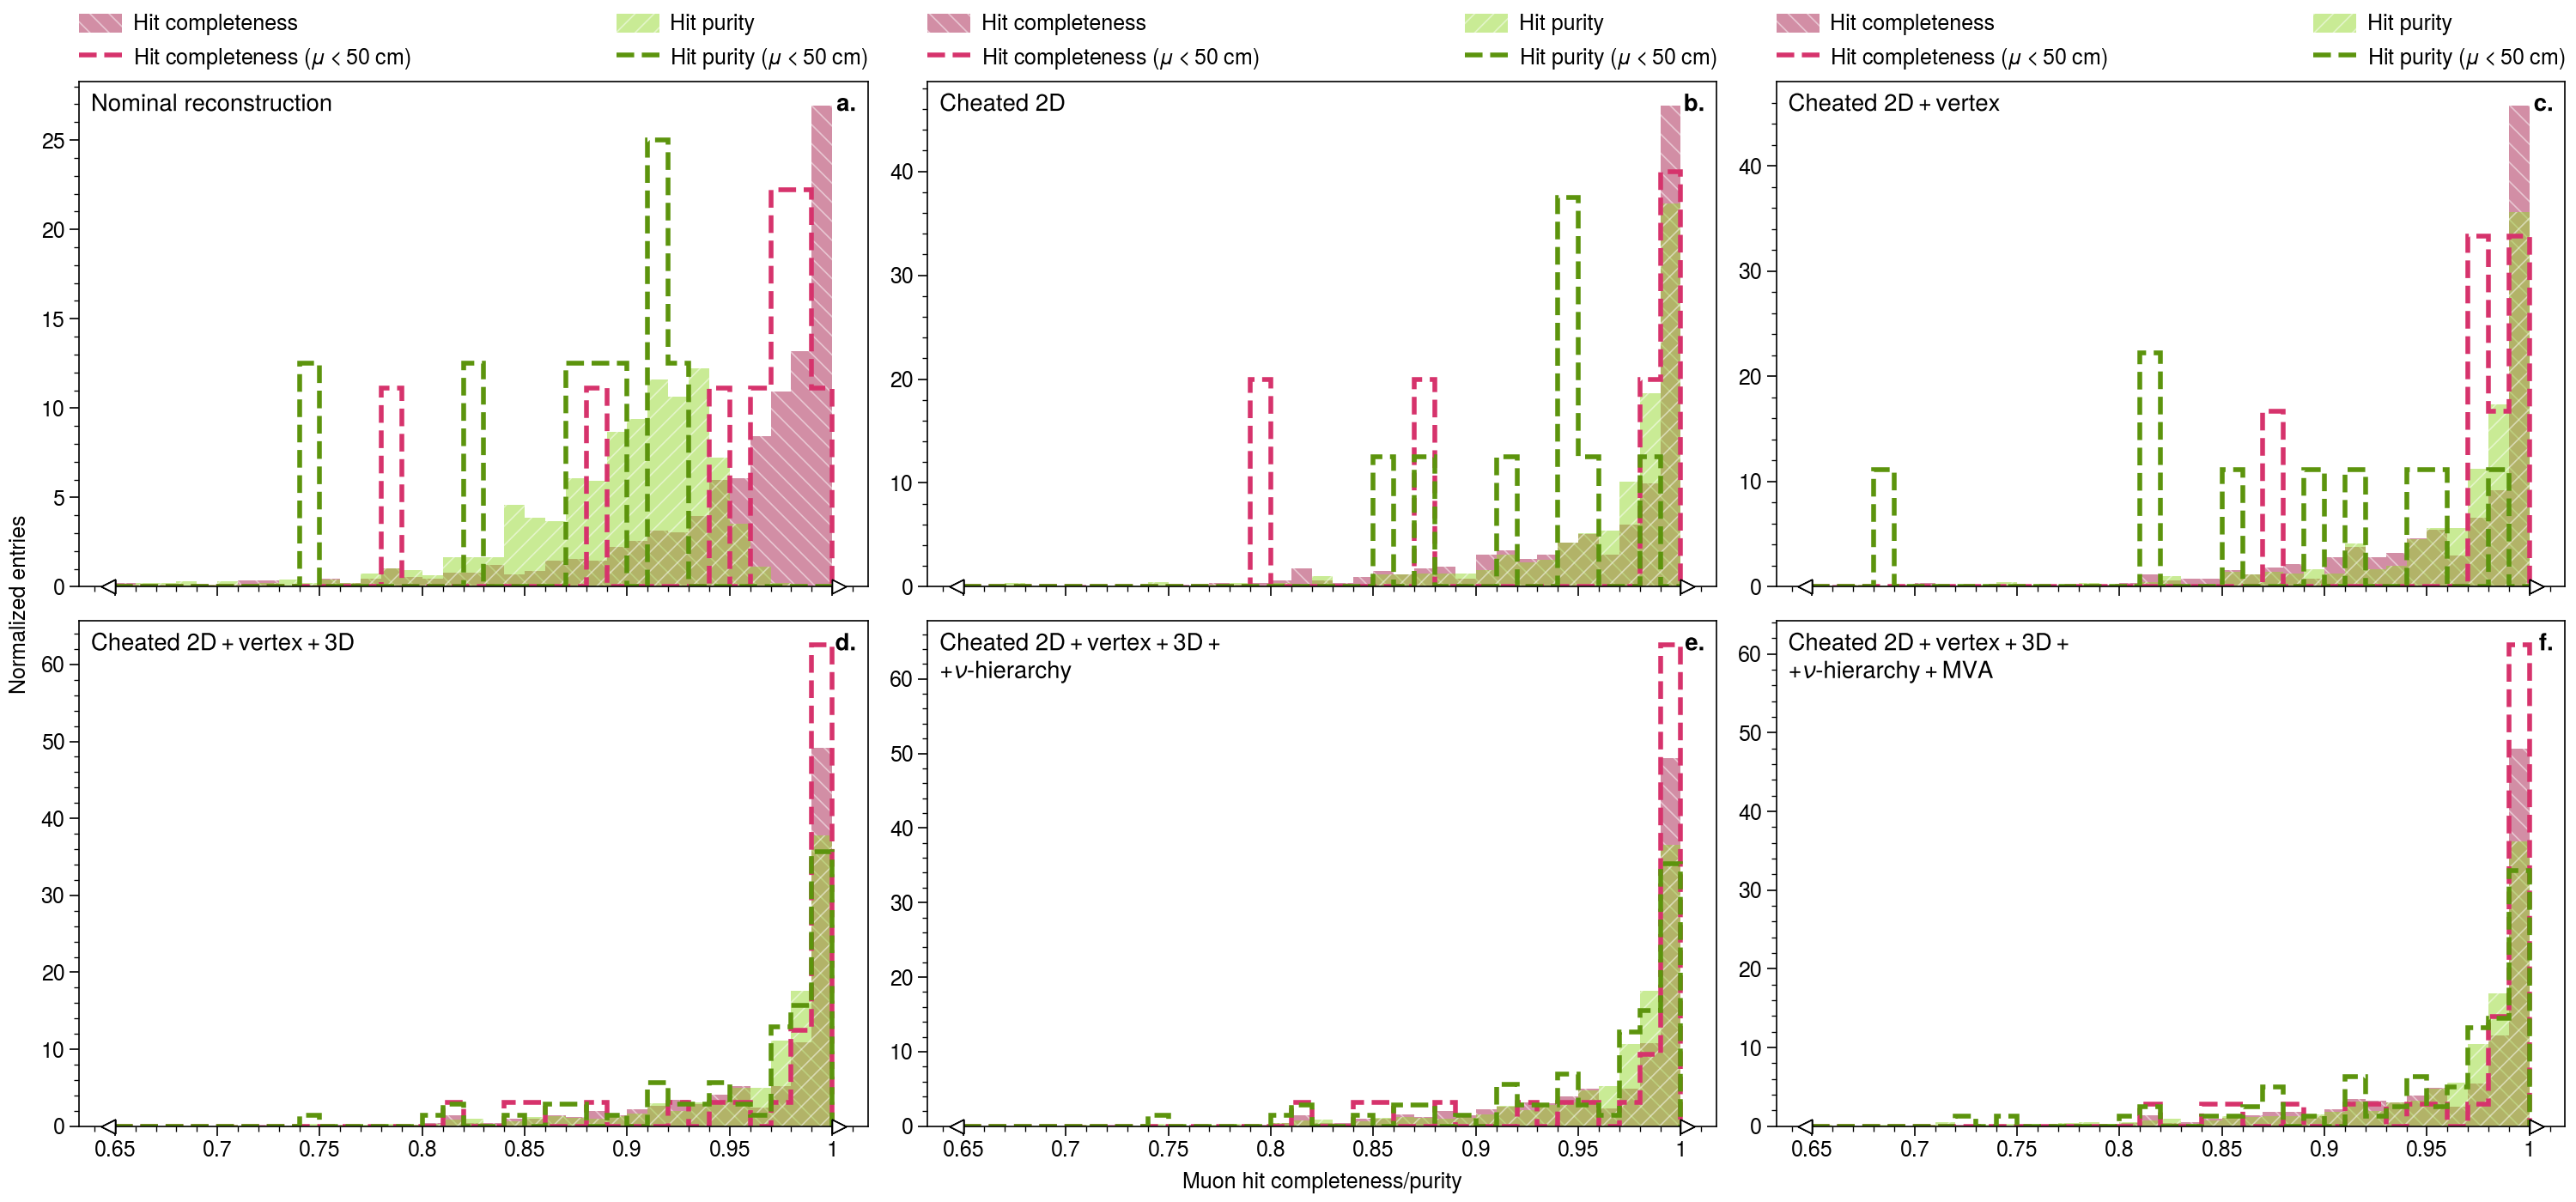

In [563]:
data_1u1p_muons = uproot.open('muon_purity_completeness_plot_1u1p.root:muon')

hit_bin = hist.axis.Regular(35, 0.65, 1.)
analysis = Component(data=data_1u1p_muons, binning=hit_bin, tree_base='{}')

fig, axs = plot.subplots(
    width=15, height=7, ncols=3, nrows=2, ylabel=f'Normalized entries',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Muon hit completeness/purity', abc='a.', abcloc='ur'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

what = 'dirt_1muShortNp'

for i, (ax, label) in enumerate(zip(axs, trees)):
    hep.histplot(analysis.get(label, 'completeness_reco_1u1p'), density=True, histtype='fill', hatch='\\\\\\', color='pink9', ax=ax, label='Hit completeness', ec='w', alpha=0.5)
    hep.histplot(analysis.get(label, 'purity_reco_1u1p'), density=True, histtype='fill', hatch='///', color='lime5', ax=ax, label='Hit purity', ec='w', alpha=0.5)

    hep.histplot(analysis.get(label, f'completeness_{what}'), density=True, histtype='step', yerr=False, color='pink7', ls='--', ax=ax, label=r'Hit completeness ($\mu<50$ cm)', lw=2)
    hep.histplot(analysis.get(label, f'purity_{what}'), density=True, histtype='step', yerr=False, color='lime9', ls='--', ax=ax, label=r'Hit purity ($\mu<50$ cm)', lw=2)

    ax.format(ultitle=trees_label[label]) # , yscale='log', ymin=0.5e-1)
    if i<3: ax.legend(ncols=2, order='C', loc='t', mode='expand') # , label=trees_label[label])

[None, None, None]

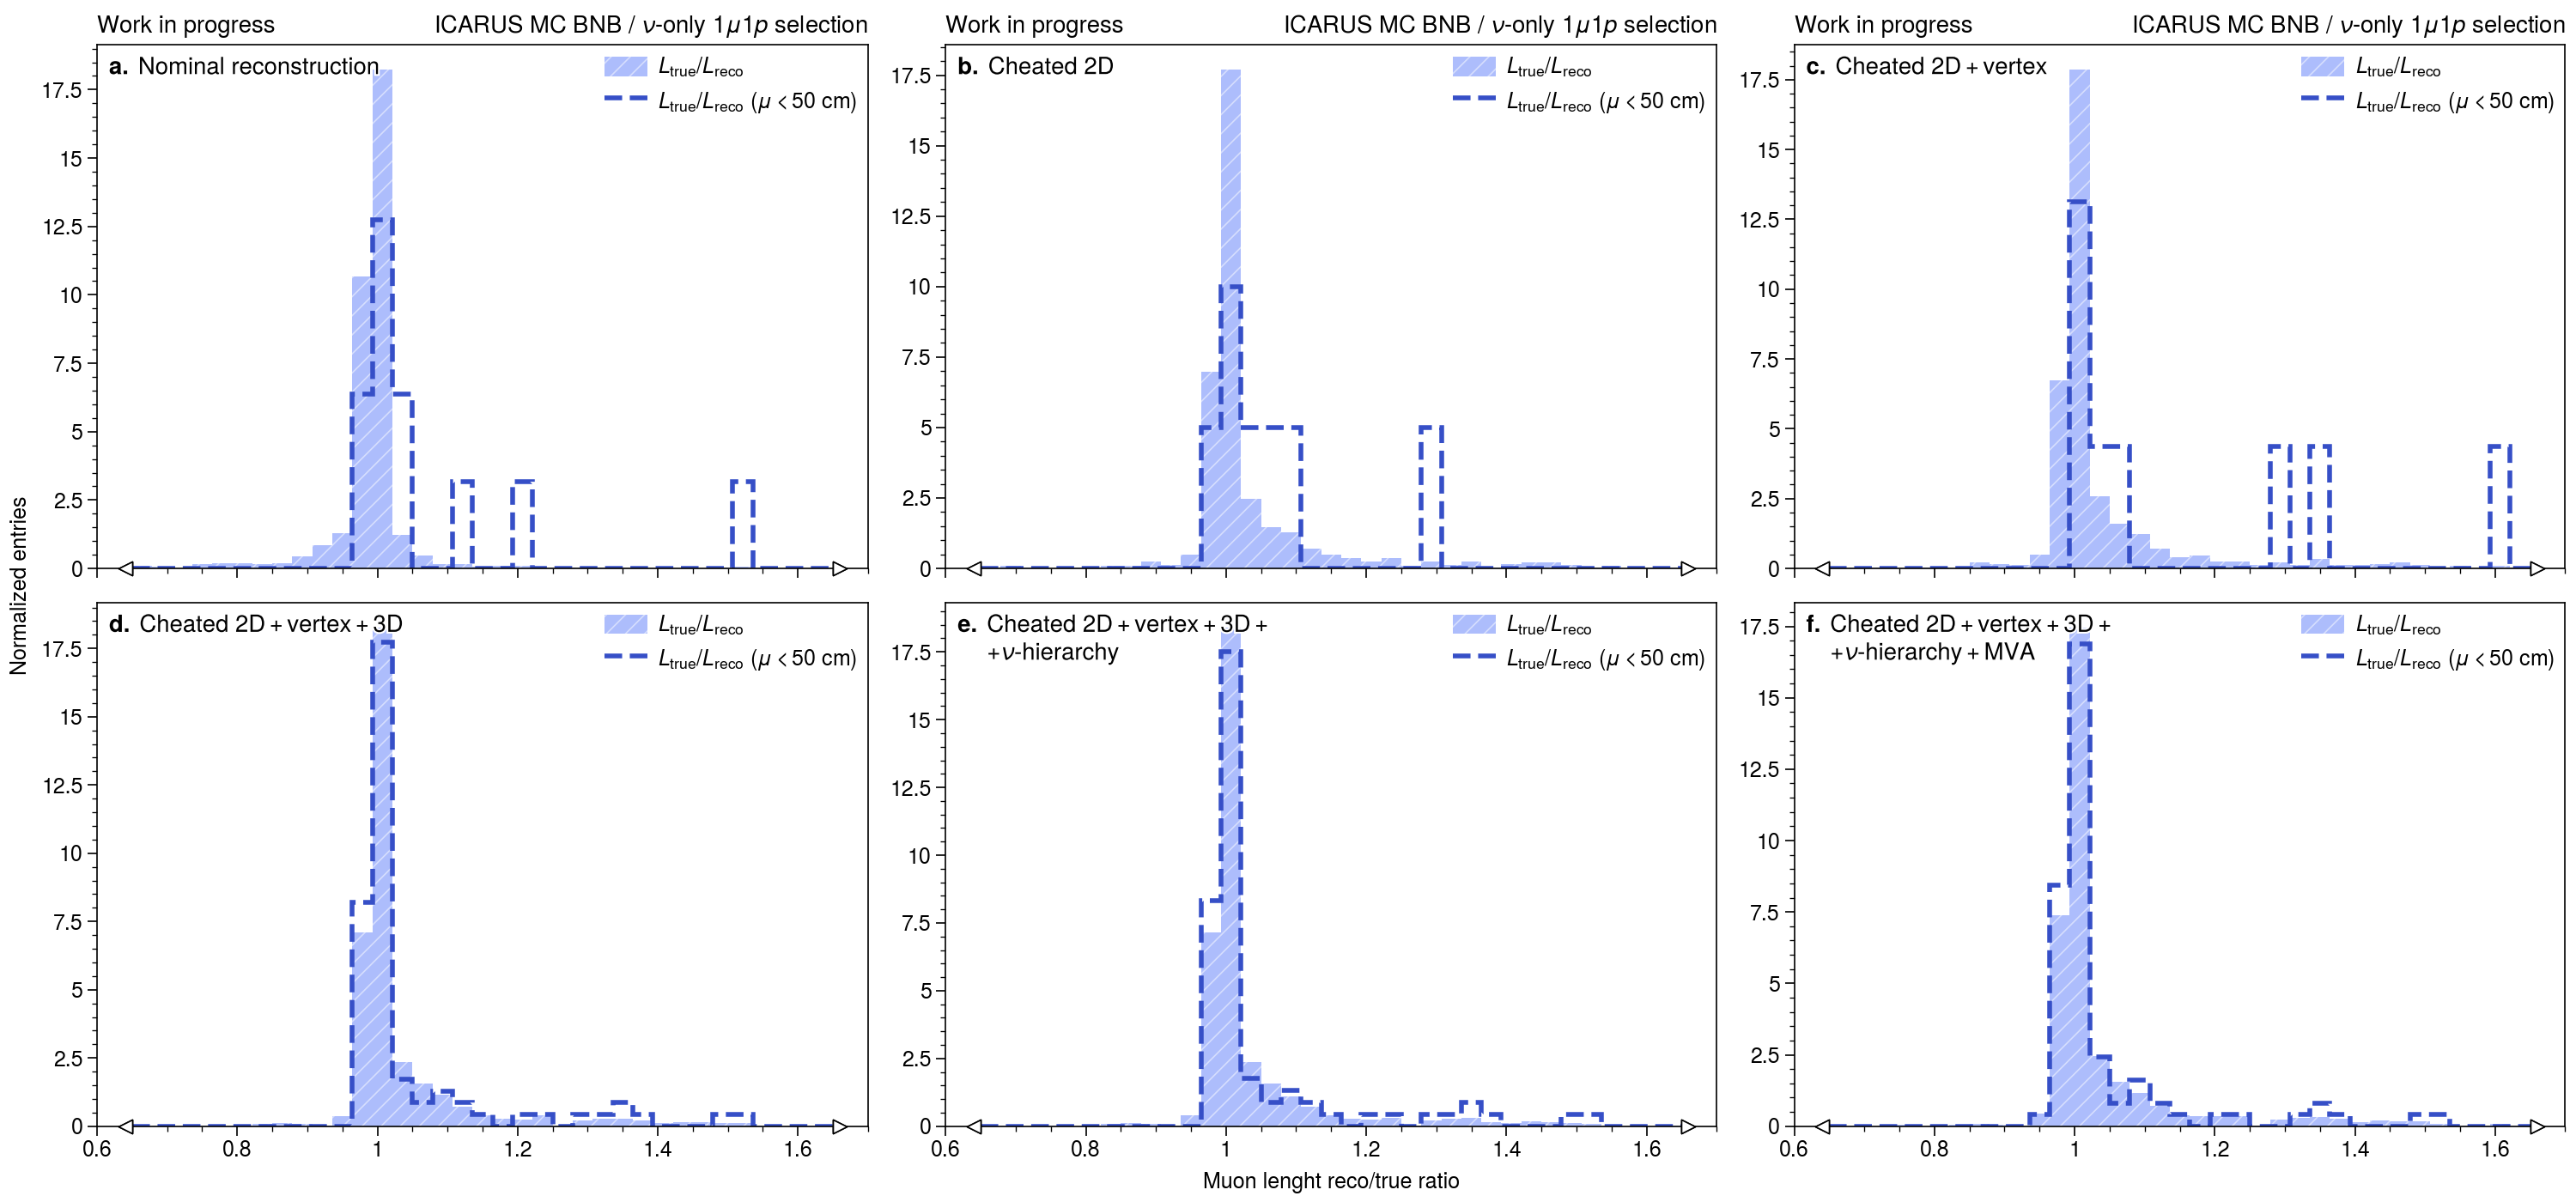

In [564]:
data_1u1p_muons = uproot.open('muon_purity_completeness_plot_1u1p.root:muon')

hit_bin = hist.axis.Regular(35, 0.65, 1.65)
analysis = Component(data=data_1u1p_muons, binning=hit_bin, tree_base='{}')

fig, axs = plot.subplots(
    width=15, height=7, ncols=3, nrows=2, ylabel=f'Normalized entries',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Muon lenght reco/true ratio', abc='a.', abcloc='ul'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

what = 'dirt_1muShortNp'

for i, (ax, label) in enumerate(zip(axs, trees)):
    hep.histplot(analysis.get(label, 'L_reco_true_ratio_reco_1u1p'), density=True, histtype='fill', hatch='///',   color='indigo5',          ax=ax, label=r'$L_\mathrm{true}/L_\mathrm{reco}$', ec='w', alpha=0.5)
    hep.histplot(analysis.get(label, f'L_reco_true_ratio_{what}'),   density=True, histtype='step', yerr=False,    color='indigo9', ls='--', ax=ax, label=r'$L_\mathrm{true}/L_\mathrm{reco}$ ($\mu<50$ cm)', lw=2)

    ax.format(ultitle=trees_label[label])
    ax.legend(ncols=1, order='F', loc='ur') # , label=trees_label[label])

[axs[i].format(
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$ selection', 
    ltitle='Work in progress'
) for i in range(3)]

[None, None, None]

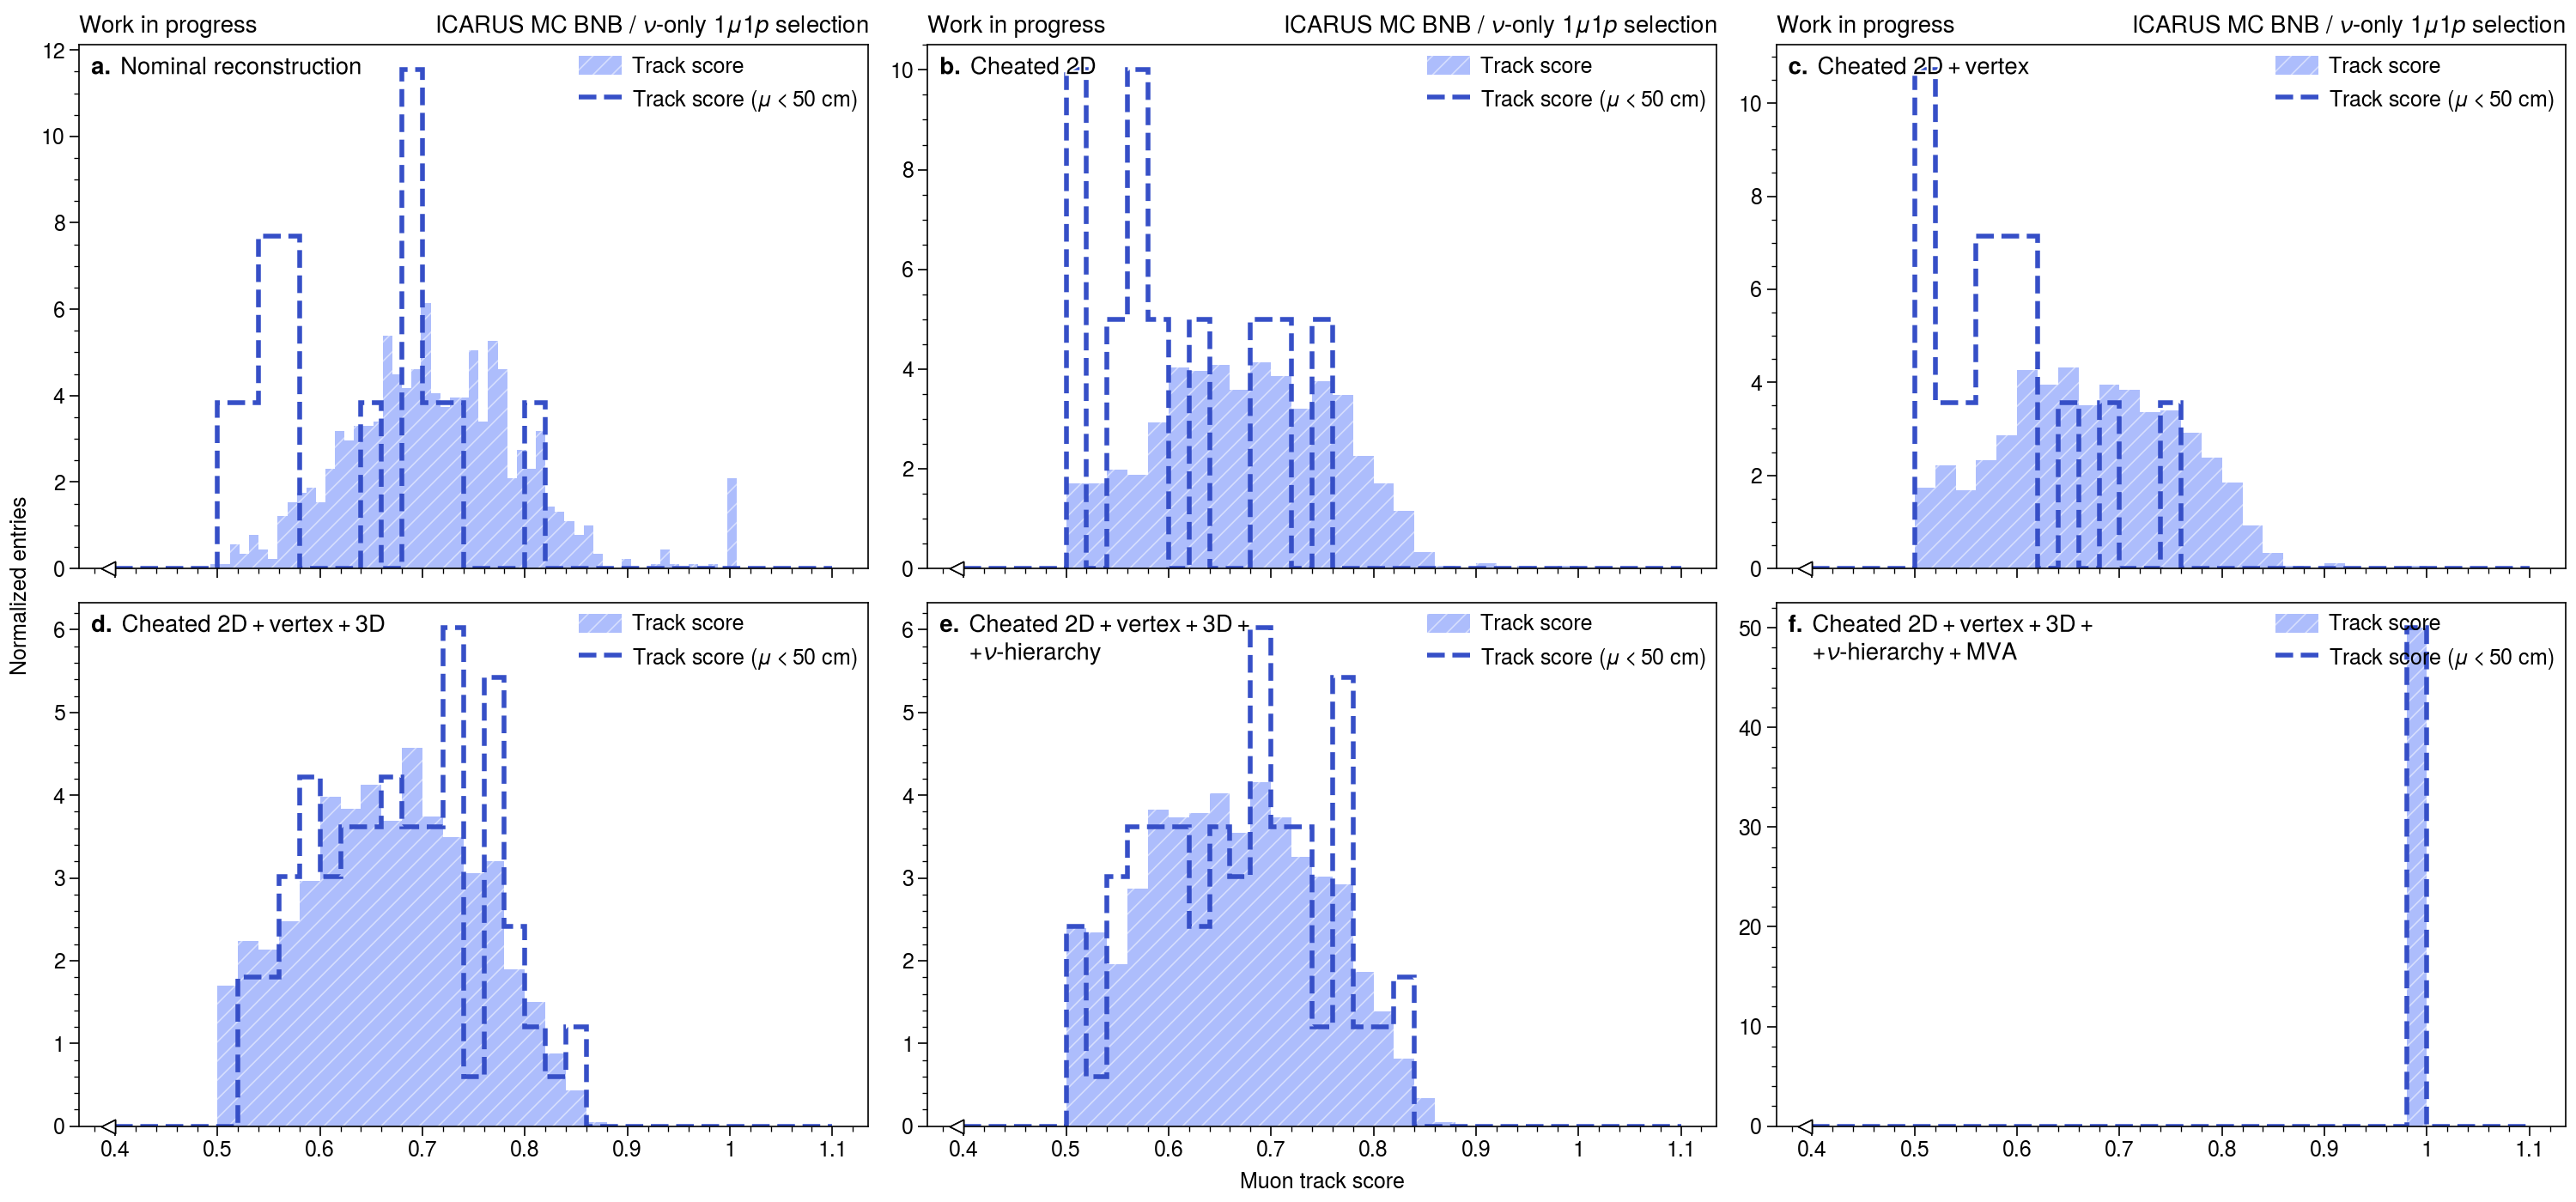

In [565]:

analysis = Component(data=data_1u1p_muons, binning=hist.axis.Regular(75, 0.4, 1.1), tree_base='{}')

fig, axs = plot.subplots(
    width=15, height=7, ncols=3, nrows=2, ylabel=f'Normalized entries',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Muon track score', abc='a.', abcloc='ul'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

what = 'dirt_1muShortNp'

for i, (ax, label) in enumerate(zip(axs, trees)):
    hep.histplot(analysis.get(label, 'spill_muon_track_score_reco_1u1p'), density=True, histtype='fill', hatch='///',   color='indigo5',          ax=ax, label=r'Track score', ec='w', alpha=0.5)
    hep.histplot(analysis.get(label, f'spill_muon_track_score_{what}', hist.axis.Regular(35, 0.4, 1.1)),   density=True, histtype='step', yerr=False,    color='indigo9', ls='--', ax=ax, label=r'Track score ($\mu<50$ cm)', lw=2)

    ax.format(ultitle=trees_label[label])
    ax.legend(ncols=1, order='F', loc='ur') # , label=trees_label[label])

[axs[i].format(
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$ selection', 
    ltitle='Work in progress'
) for i in range(3)]

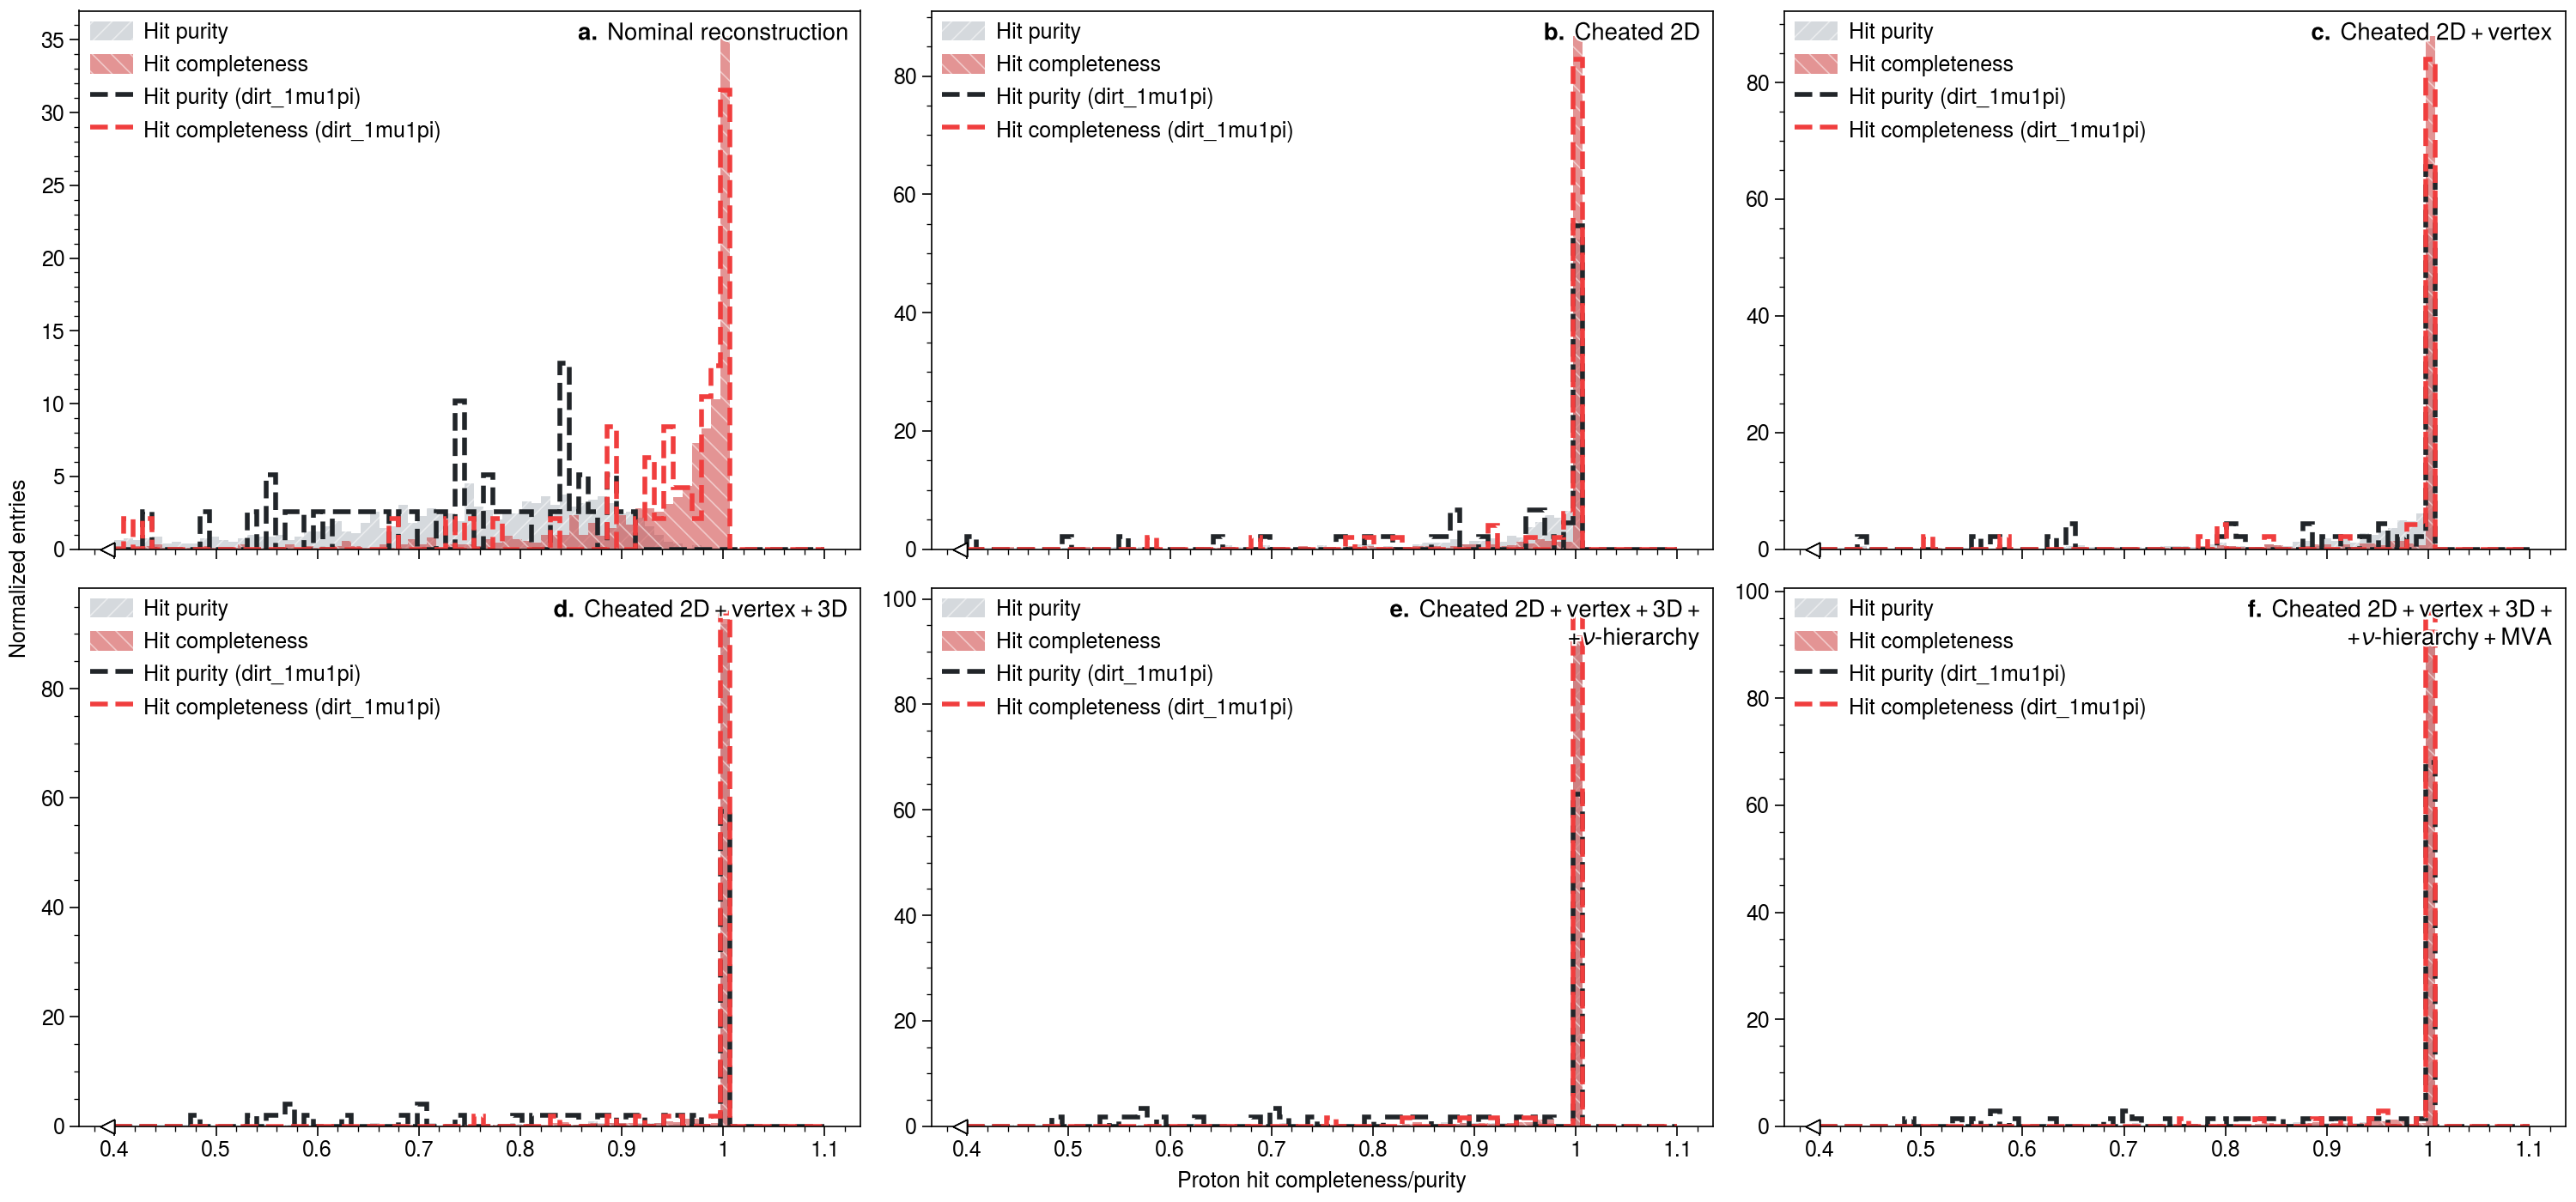

In [566]:
data_1u1p_protons = uproot.open('proton_purity_completeness_plot_1u1p.root:proton')

analysis_proton = Component(data=data_1u1p_protons, binning=hist.axis.Regular(75, 0.4, 1.1), tree_base='reco_true_{}')


fig, axs = plot.subplots(
    width=15, height=7, ncols=3, nrows=2, ylabel=f'Normalized entries',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Proton hit completeness/purity', abc='a.', abcloc='ur'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

what = 'numuCC_2p'
what = 'dirt_1mu1pi'

for i, (ax, label) in enumerate(zip(axs, trees)):
    hep.histplot(analysis_proton.get(label, 'hit_purity_reco_1u1p'), density=True, histtype='fill', hatch='///', color='gray5', ax=ax, label='Hit purity', ec='w', alpha=0.5)
    hep.histplot(analysis_proton.get(label, 'hit_completeness_reco_1u1p'), density=True, histtype='fill', hatch='\\\\\\', color='red9', ax=ax, label='Hit completeness', ec='w', alpha=0.5)

    hep.histplot(analysis_proton.get(label, f'hit_purity_{what}'), density=True, histtype='step', yerr=False, color='gray9', ls='--', ax=ax, label=f'Hit purity ({what})', lw=2)
    hep.histplot(analysis_proton.get(label, f'hit_completeness_{what}'), density=True, histtype='step', yerr=False, color='red7', ls='--', ax=ax, label=f'Hit completeness ({what})', lw=2)

    ax.format(urtitle=trees_label[label])
    ax.legend(ncols=1, order='F', loc='ul') # , label=trees_label[label])

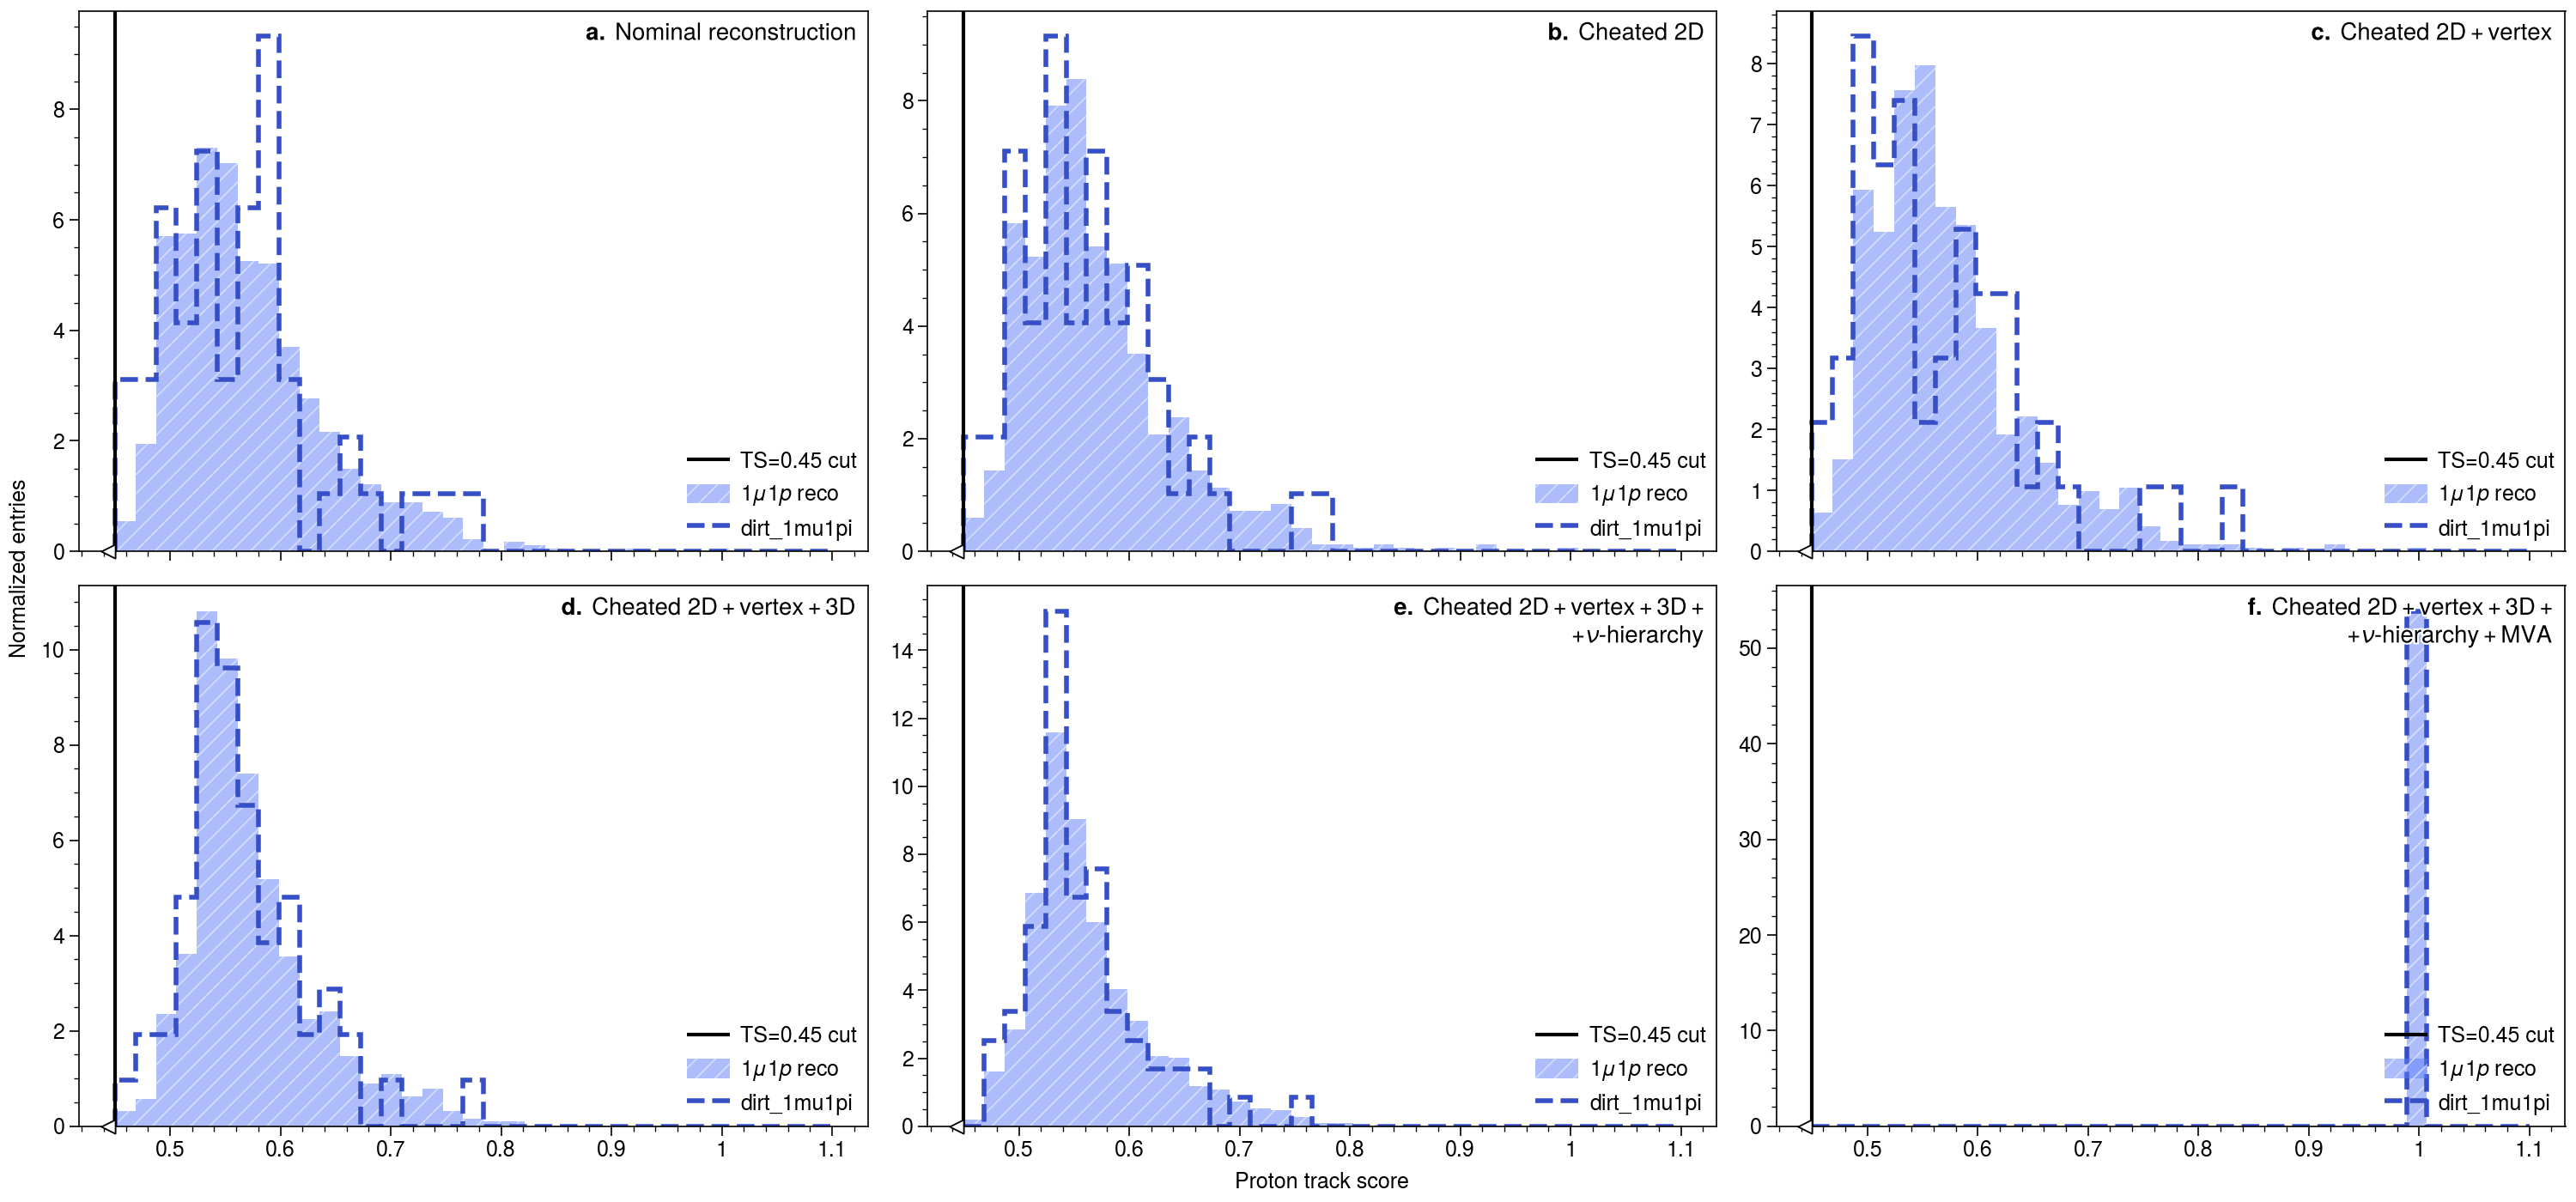

In [567]:
fig, axs = plot.subplots(
    width=15, height=7, ncols=3, nrows=2, ylabel=f'Normalized entries',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Proton track score', abc='a.', abcloc='ur'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

what = 'numuCC_2p'
what = 'dirt_1mu1pi'

for i, (ax, label) in enumerate(zip(axs, trees)):
    hep.histplot(analysis_proton.get(label, 'track_score_reco_1u1p', hist.axis.Regular(35, 0.45, 1.1)), density=True, histtype='fill', hatch='///',   color='indigo5',          ax=ax, label=r'$1\mu1p$ reco', ec='w', alpha=0.5)
    hep.histplot(analysis_proton.get(label, f'track_score_{what}', hist.axis.Regular(35, 0.45, 1.1)),   density=True, histtype='step', yerr=False,    color='indigo9', ls='--', ax=ax, label=f'{what}', lw=2)

    ax.format(urtitle=trees_label[label])
    ax.axvline(0.45, color='k', label='TS=0.45 cut')
    ax.legend(ncols=1, order='F', loc='lr') # , label=trees_label[label])


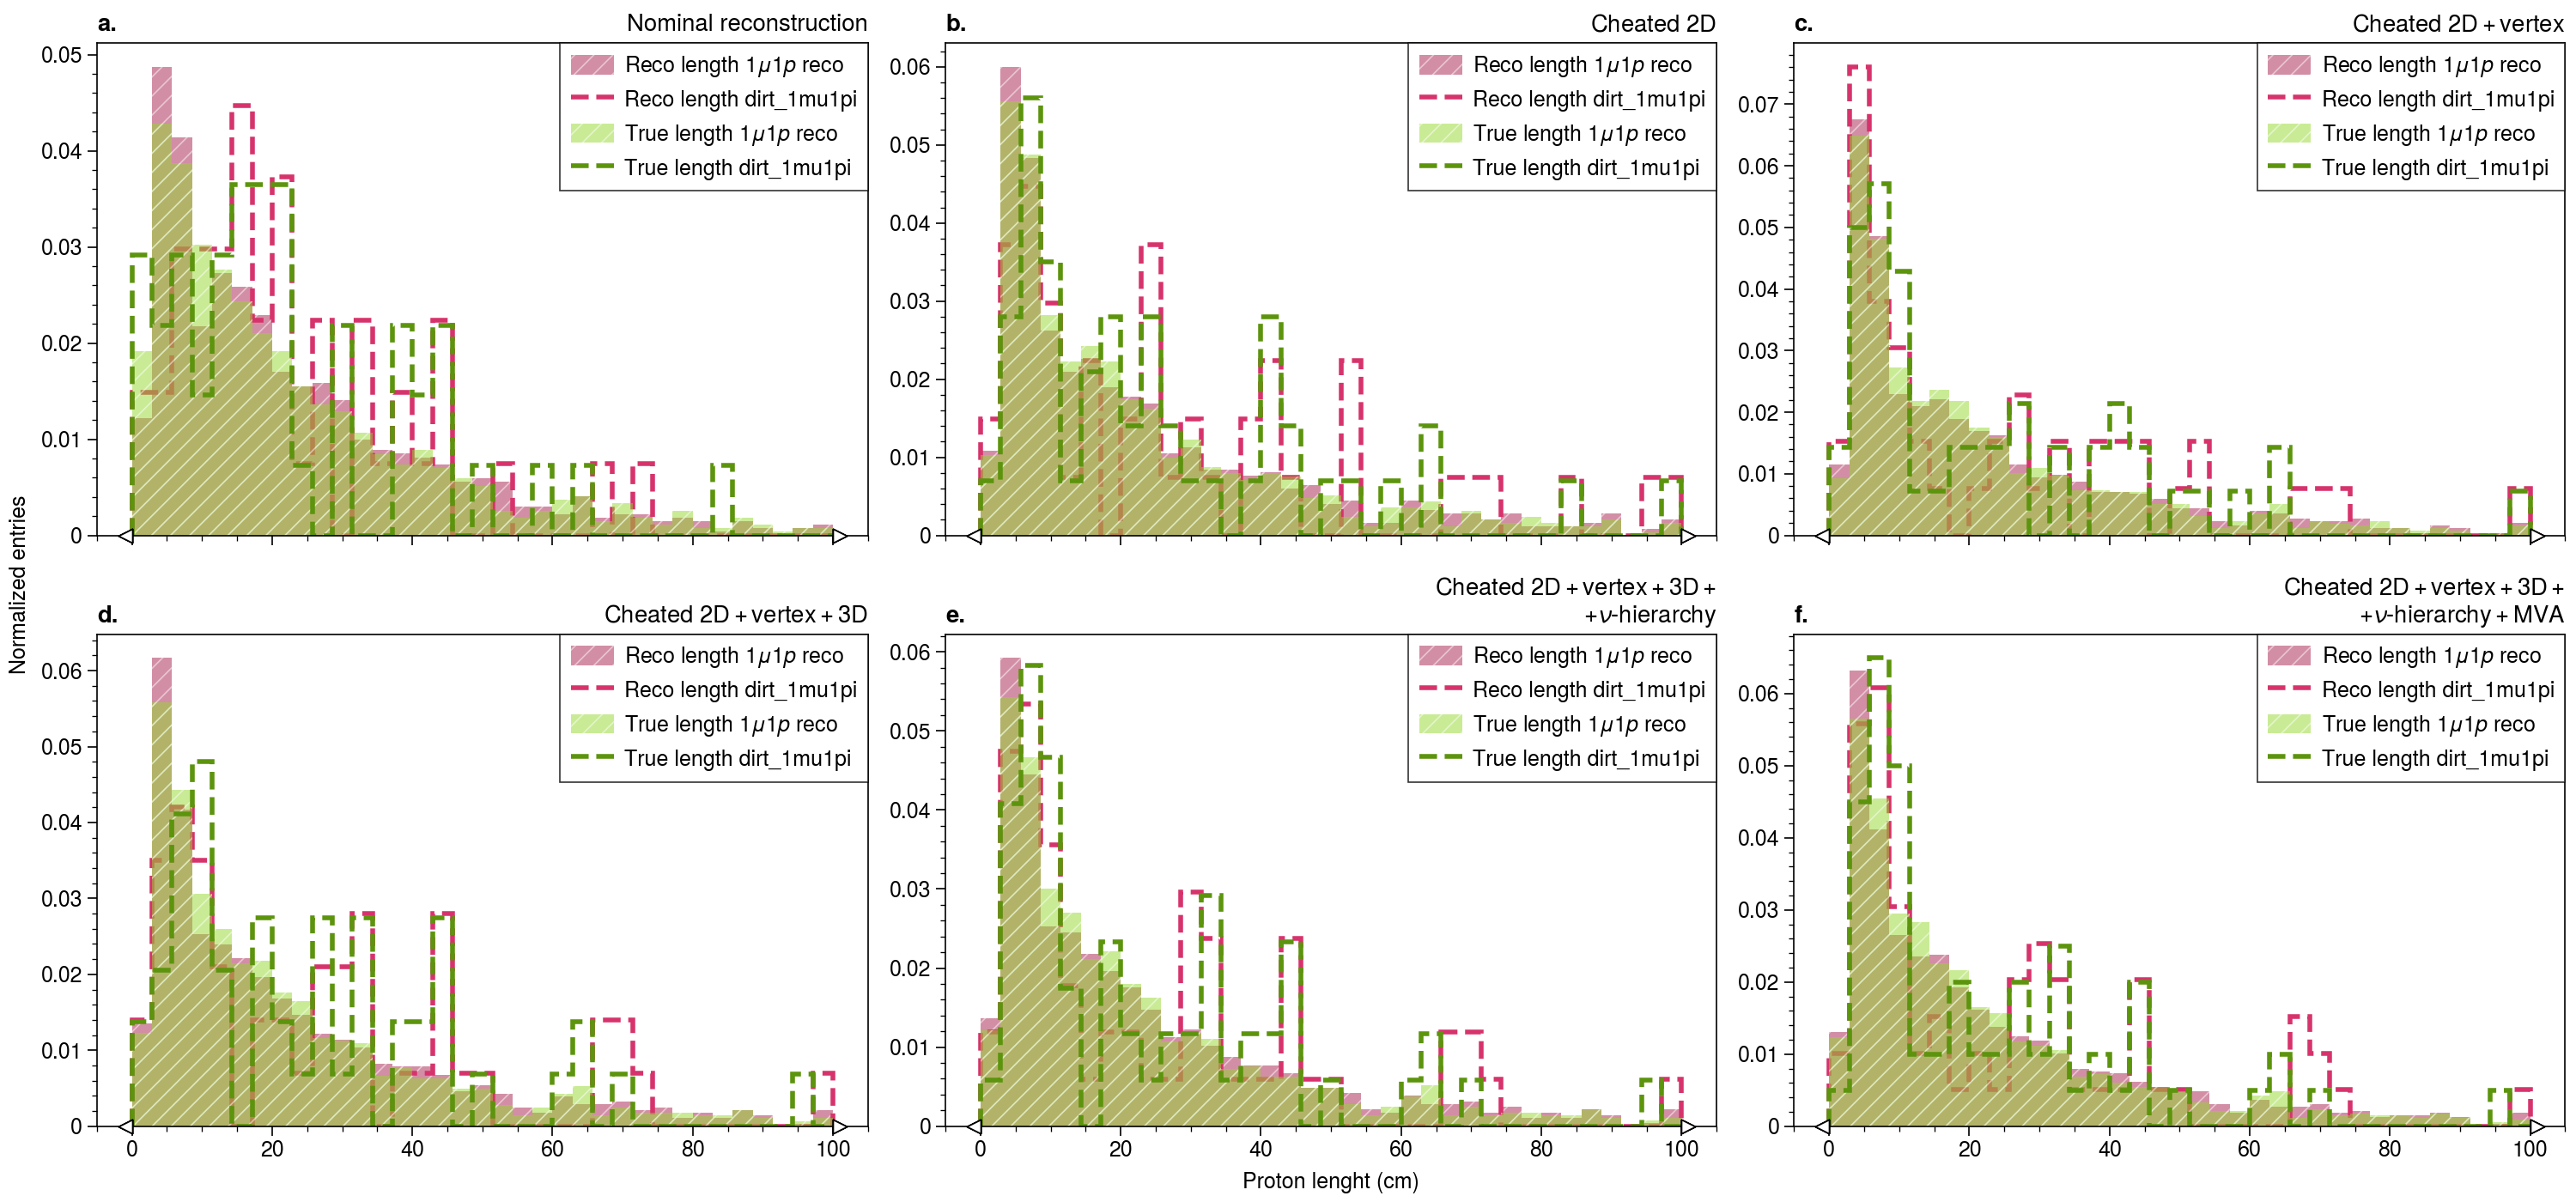

In [568]:
fig, axs = plot.subplots(
    width=15, height=7, ncols=3, nrows=2, ylabel=f'Normalized entries',
    titlecolor='k', share=False, grid=False, sharey='labs',
    sharex=True, xlabel='Proton lenght (cm)', abc='a.', abcloc='l'
)

trees = [
    'nominal_reconstruction',
    'cheated_2D',
    'cheated_2D_Vtx',
    'cheated_2D_Vtx_3D',
    'cheated_2D_Vtx_3D_Nu',
    'cheated_2D_Vtx_3D_Nu_Mva',
]

trees_label = {
    'cheated_2D_Vtx_3D_Nu_Mva': 'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy} + \\mathrm{MVA}$', 
    'cheated_2D_Vtx_3D_Nu':     'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D} + $\n$ + \\nu\\text{-hierarchy}$', 
    'cheated_2D_Vtx_3D':        'Cheated $2\\mathrm{D} + \\mathrm{vertex} + 3\\mathrm{D}$', 
    'cheated_2D_Vtx':           'Cheated $2\\mathrm{D} + \\mathrm{vertex}$', 
    'cheated_2D':               'Cheated $2\\mathrm{D}$', 
    'nominal_reconstruction':   'Nominal reconstruction'
}

what = 'numuCC_2p'
what = 'dirt_1mu1pi'

for i, (ax, label) in enumerate(zip(axs, trees)):
    hep.histplot(analysis_proton.get(label, 'reco_length_reco_1u1p', hist.axis.Regular(35, 0, 100)), density=True, histtype='fill', hatch='///',   color='pink9',          ax=ax, label=r'Reco length $1\mu1p$ reco', ec='w', alpha=0.5)
    hep.histplot(analysis_proton.get(label, f'reco_length_{what}', hist.axis.Regular(35, 0, 100)),   density=True, histtype='step', yerr=False,    color='pink7', ls='--', ax=ax, label=f'Reco length {what}', lw=2)

    hep.histplot(analysis_proton.get(label, 'true_length_reco_1u1p', hist.axis.Regular(35, 0, 100)), density=True, histtype='fill', hatch='///',   color='lime5',          ax=ax, label=r'True length $1\mu1p$ reco', ec='w', alpha=0.5)
    hep.histplot(analysis_proton.get(label, f'true_length_{what}', hist.axis.Regular(35, 0, 100)),   density=True, histtype='step', yerr=False,    color='lime9', ls='--', ax=ax, label=f'True length {what}', lw=2)

    ax.format(rtitle=trees_label[label])
    ax.legend(ncols=1, order='F', loc='ur', frameon=True) # , label=trees_label[label])


In [569]:
analysis_proton.keys('nominal_reconstruction')

['event',
 'reco_length_reco_1u1p',
 'reco_length_numuCC',
 'reco_length_numuCC_2p',
 'reco_length_numuCC_3p',
 'reco_length_numuCC_Ngreater3p',
 'reco_length_dirt_1mu1pi',
 'reco_length_dirt_1mu2pi',
 'reco_length_dirt_1mu3pi',
 'reco_length_dirt_1muNpi',
 'reco_length_dirt_2p',
 'reco_length_dirt_1pi1p',
 'true_length_reco_1u1p',
 'true_length_numuCC',
 'true_length_numuCC_2p',
 'true_length_numuCC_3p',
 'true_length_numuCC_Ngreater3p',
 'true_length_dirt_1mu1pi',
 'true_length_dirt_1mu2pi',
 'true_length_dirt_1mu3pi',
 'true_length_dirt_1muNpi',
 'true_length_dirt_2p',
 'true_length_dirt_1pi1p',
 'L_reco_true_ratio_reco_1u1p',
 'L_reco_true_ratio_numuCC',
 'L_reco_true_ratio_numuCC_2p',
 'L_reco_true_ratio_numuCC_3p',
 'L_reco_true_ratio_numuCC_Ngreater3p',
 'L_reco_true_ratio_dirt_1mu1pi',
 'L_reco_true_ratio_dirt_1mu2pi',
 'L_reco_true_ratio_dirt_1mu3pi',
 'L_reco_true_ratio_dirt_1muNpi',
 'L_reco_true_ratio_dirt_2p',
 'L_reco_true_ratio_dirt_1pi1p',
 'hit_completeness_reco_1u1p',

# Vertex and MVA cheating tests

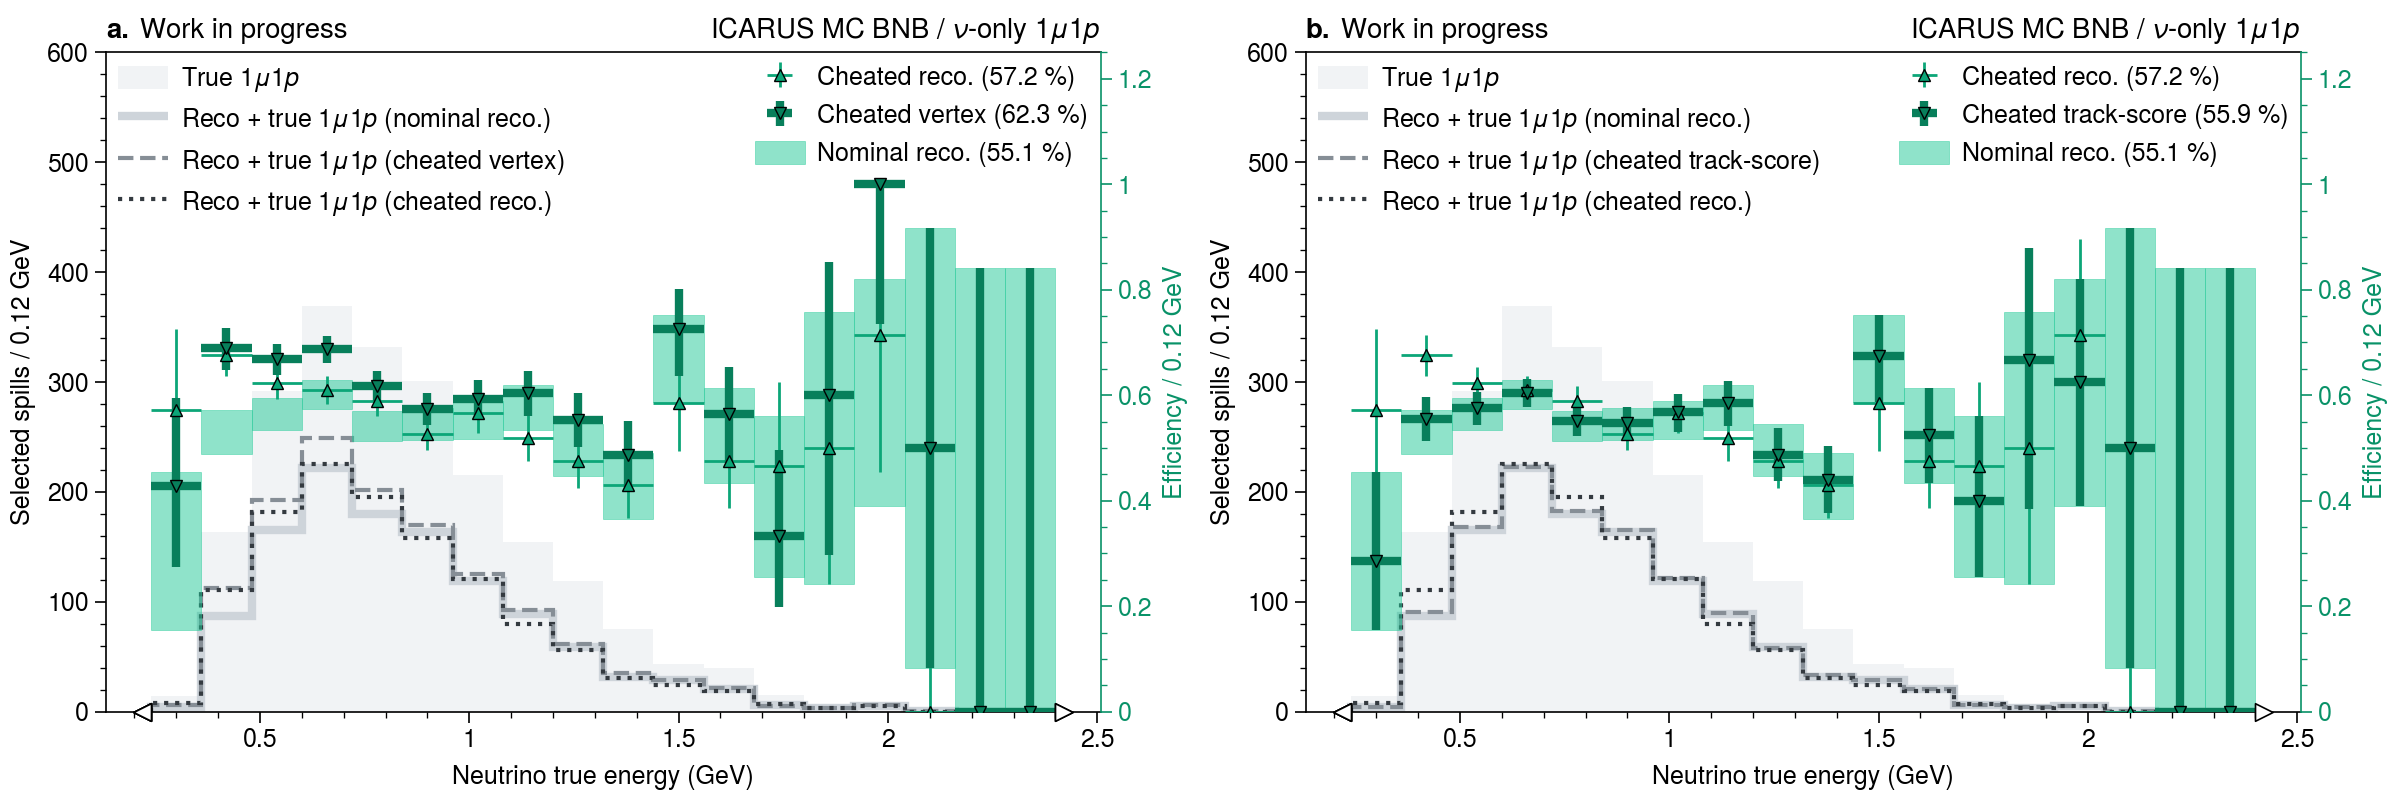

In [570]:

analysis_1u1p_vtx_mva = Analysis(data=uproot.open('efficiency_plot_1u1p.root:vtx_mva_only_cheating'), binning=energy_bins, )
analysis_1u1p_vtx_mva_integrated = Analysis(data=uproot.open('efficiency_plot_1u1p.root:vtx_mva_only_cheating'), binning=hist.axis.Regular(1, 0.24, 2.4), )

color='teal'
variable = 'true_E'

variable_dict = {
    'true_E': 'true energy',
    'reco_E': 'reconstructed energy',
    'reco_pT': 'reconstructed $p_T$'
}

fig, axs = plot.subplots(
    width=12, height=4, ncols=2, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, 
    xlabel='Neutrino {} (GeV)'.format(variable_dict[variable]), abc='a.', abcloc='l',
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$', 
    ltitle='Work in progress'
)

ax1, ax2 = axs

cheated_dict = {
    'vtx': 'vertex',
    'mva': 'track-score'
}

for ax, cheated in zip(axs, ['vtx', 'mva']):

    reco_true, _, true = analysis_1u1p_vtx_mva.spectra('nominal', variable)
    hep.histplot(true, ax=ax, histtype='fill', color='gray1', label=r'True $1\mu1p$')
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray4', lw=3, label=r'Reco + true $1\mu1p$ (nominal reco.)')
    
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated_{}'.format(cheated), variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray6', lw=1.5, ls='--', label=r'Reco + true $1\mu1p$ (cheated {})'.format(cheated_dict[cheated]))
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated', variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray8', lw=1.5, ls=':', label=r'Reco + true $1\mu1p$ (cheated reco.)')
    
    ax.format(ymax=600)
    ax.legend(ncols=1, loc='ul')
    
    secax = ax.alty(color=f'{color}8', label=f'Efficiency / {energy_bins.widths[0]:.2f} GeV')
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.efficiency('cheated', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('cheated', variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, 
                        color=f'{color}7', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Cheated reco. ({:.1f} %)'.format(integrated_efficiency[0]*100))
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.efficiency('cheated_{}'.format(cheated), variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('cheated_{}'.format(cheated), variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, color=f'{color}9', fmt='v', markersize=4, 
                        mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Cheated {} ({:.1f} %)'.format(cheated_dict[cheated], integrated_efficiency[0]*100))
    
    efficiency, (low, high) = analysis_1u1p_vtx_mva.efficiency('nominal', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('nominal', variable)
    eb = secax.bar(x=energy_bins.centers, height=high+low, bottom=efficiency-low, alpha=0.5, width=1,
                        color=f'{color}5', label='Nominal reco. ({:.1f} %)'.format(integrated_efficiency[0]*100), edgefix=True)
    
    secax.format(ymax=1.25)
    secax.legend(ncols=1, loc='ur')


fig.savefig('1u1p_efficiency_vtx_mva.pdf', bbox_inches='tight')


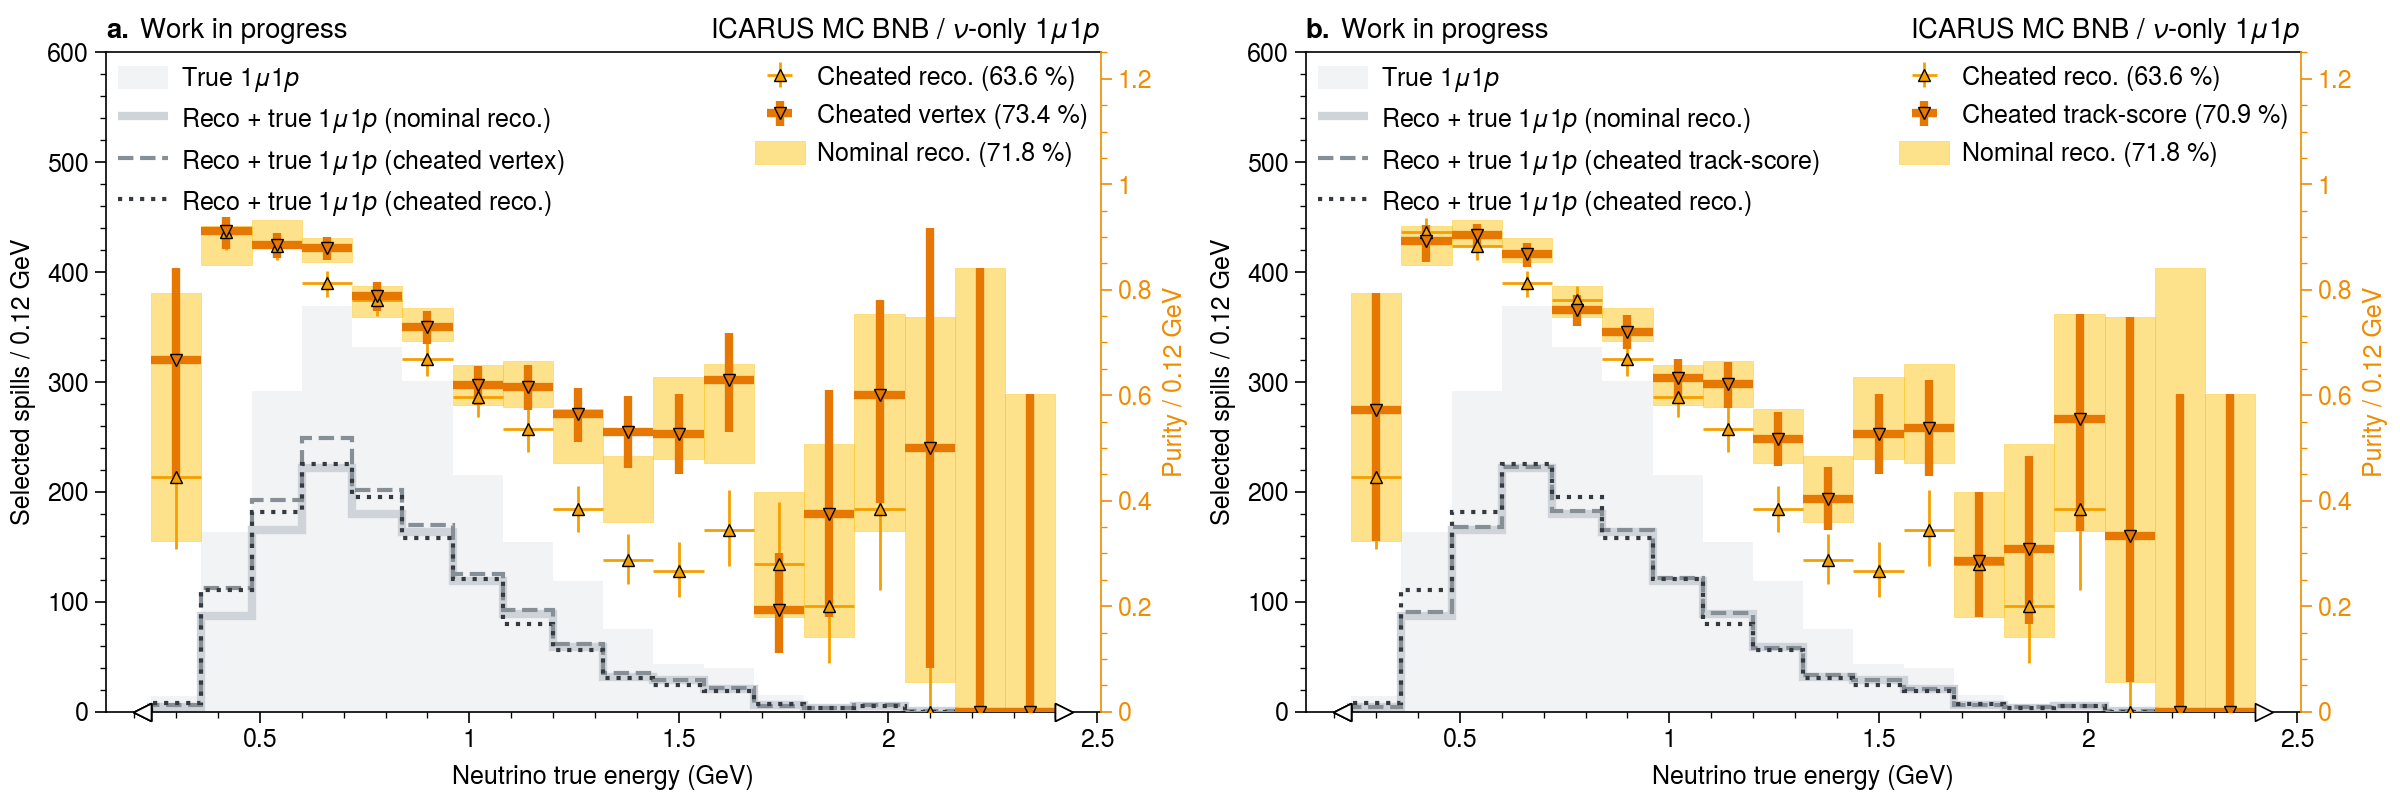

In [571]:
analysis_1u1p_vtx_mva = Analysis(data=uproot.open('efficiency_plot_1u1p.root:vtx_mva_only_cheating'), binning=energy_bins, )
analysis_1u1p_vtx_mva_integrated = Analysis(data=uproot.open('efficiency_plot_1u1p.root:vtx_mva_only_cheating'), binning=hist.axis.Regular(1, 0.24, 2.4), )

color='yellow'
variable = 'true_E'

variable_dict = {
    'true_E': 'true energy',
    'reco_E': 'reconstructed energy',
    'reco_pT': 'reconstructed $p_T$'
}

fig, axs = plot.subplots(
    width=12, height=4, ncols=2, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, 
    xlabel='Neutrino {} (GeV)'.format(variable_dict[variable]), abc='a.', abcloc='l',
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$', 
    ltitle='Work in progress'
)

ax1, ax2 = axs

cheated_dict = {
    'vtx': 'vertex',
    'mva': 'track-score'
}

for ax, cheated in zip(axs, ['vtx', 'mva']):

    reco_true, _, true = analysis_1u1p_vtx_mva.spectra('nominal', variable)
    hep.histplot(true, ax=ax, histtype='fill', color='gray1', label=r'True $1\mu1p$')
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray4', lw=3, label=r'Reco + true $1\mu1p$ (nominal reco.)')
    
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated_{}'.format(cheated), variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray6', lw=1.5, ls='--', label=r'Reco + true $1\mu1p$ (cheated {})'.format(cheated_dict[cheated]))
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated', variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray8', lw=1.5, ls=':', label=r'Reco + true $1\mu1p$ (cheated reco.)')
    
    ax.format(ymax=600)
    ax.legend(ncols=1, loc='ul')
    
    secax = ax.alty(color=f'{color}8', label=f'Purity / {energy_bins.widths[0]:.2f} GeV')
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.purity('cheated', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.purity('cheated', variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, 
                        color=f'{color}7', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Cheated reco. ({:.1f} %)'.format(integrated_efficiency[0]*100))
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.purity('cheated_{}'.format(cheated), variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.purity('cheated_{}'.format(cheated), variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, color=f'{color}9', fmt='v', markersize=4, 
                        mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Cheated {} ({:.1f} %)'.format(cheated_dict[cheated], integrated_efficiency[0]*100))
    
    efficiency, (low, high) = analysis_1u1p_vtx_mva.purity('nominal', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.purity('nominal', variable)
    eb = secax.bar(x=energy_bins.centers, height=high+low, bottom=efficiency-low, alpha=0.5, width=1,
                        color=f'{color}5', label='Nominal reco. ({:.1f} %)'.format(integrated_efficiency[0]*100), edgefix=True)
    
    secax.format(ymax=1.25)
    secax.legend(ncols=1, loc='ur')


fig.savefig('1u1p_purity_vtx_mva.pdf', bbox_inches='tight')

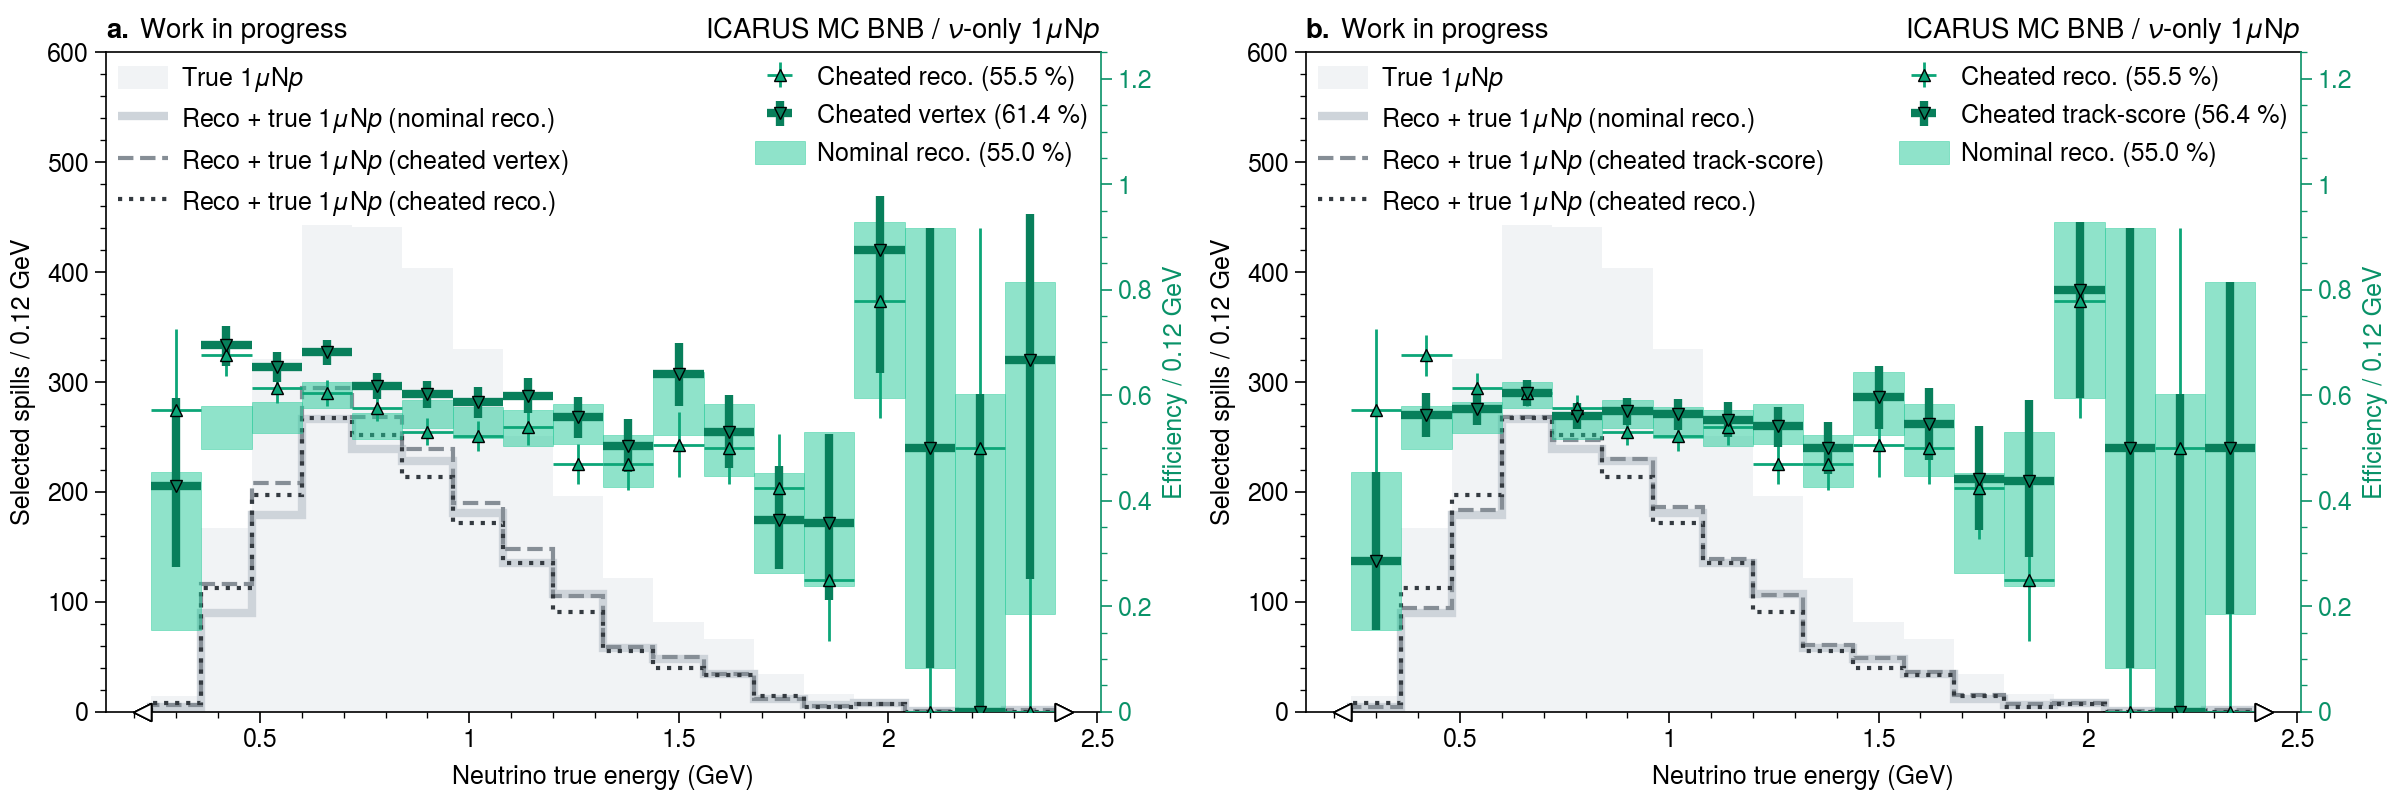

In [572]:

analysis_1u1p_vtx_mva = Analysis(data=uproot.open('efficiency_plot_1uNp.root:vtx_mva_only_cheating'), binning=energy_bins, )
analysis_1u1p_vtx_mva_integrated = Analysis(data=uproot.open('efficiency_plot_1uNp.root:vtx_mva_only_cheating'), binning=hist.axis.Regular(1, 0.24, 2.4), )

color='teal'
variable = 'true_E'

variable_dict = {
    'true_E': 'true energy',
    'reco_E': 'reconstructed energy',
    'reco_pT': 'reconstructed $p_T$'
}

fig, axs = plot.subplots(
    width=12, height=4, ncols=2, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, 
    xlabel='Neutrino {} (GeV)'.format(variable_dict[variable]), abc='a.', abcloc='l',
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu\mathrm{N}p$', 
    ltitle='Work in progress'
)

ax1, ax2 = axs

cheated_dict = {
    'vtx': 'vertex',
    'mva': 'track-score'
}

for ax, cheated in zip(axs, ['vtx', 'mva']):

    reco_true, _, true = analysis_1u1p_vtx_mva.spectra('nominal', variable)
    hep.histplot(true, ax=ax, histtype='fill', color='gray1', label=r'True $1\mu\mathrm{N}p$')
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray4', lw=3, label=r'Reco + true $1\mu\mathrm{N}p$ (nominal reco.)')
    
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated_{}'.format(cheated), variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray6', lw=1.5, ls='--', label=r'Reco + true $1\mu\mathrm{{N}}p$ (cheated {})'.format(cheated_dict[cheated]))
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated', variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray8', lw=1.5, ls=':', label=r'Reco + true $1\mu\mathrm{N}p$ (cheated reco.)')
    
    ax.format(ymax=600)
    ax.legend(ncols=1, loc='ul')
    
    secax = ax.alty(color=f'{color}8', label=f'Efficiency / {energy_bins.widths[0]:.2f} GeV')
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.efficiency('cheated', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('cheated', variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, 
                        color=f'{color}7', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Cheated reco. ({:.1f} %)'.format(integrated_efficiency[0]*100))
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.efficiency('cheated_{}'.format(cheated), variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('cheated_{}'.format(cheated), variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, color=f'{color}9', fmt='v', markersize=4, 
                        mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Cheated {} ({:.1f} %)'.format(cheated_dict[cheated], integrated_efficiency[0]*100))
    
    efficiency, (low, high) = analysis_1u1p_vtx_mva.efficiency('nominal', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('nominal', variable)
    eb = secax.bar(x=energy_bins.centers, height=high+low, bottom=efficiency-low, alpha=0.5, width=1,
                        color=f'{color}5', label='Nominal reco. ({:.1f} %)'.format(integrated_efficiency[0]*100), edgefix=True)
    
    secax.format(ymax=1.25)
    secax.legend(ncols=1, loc='ur')


fig.savefig('1uNp_efficiency_vtx_mva.pdf', bbox_inches='tight')


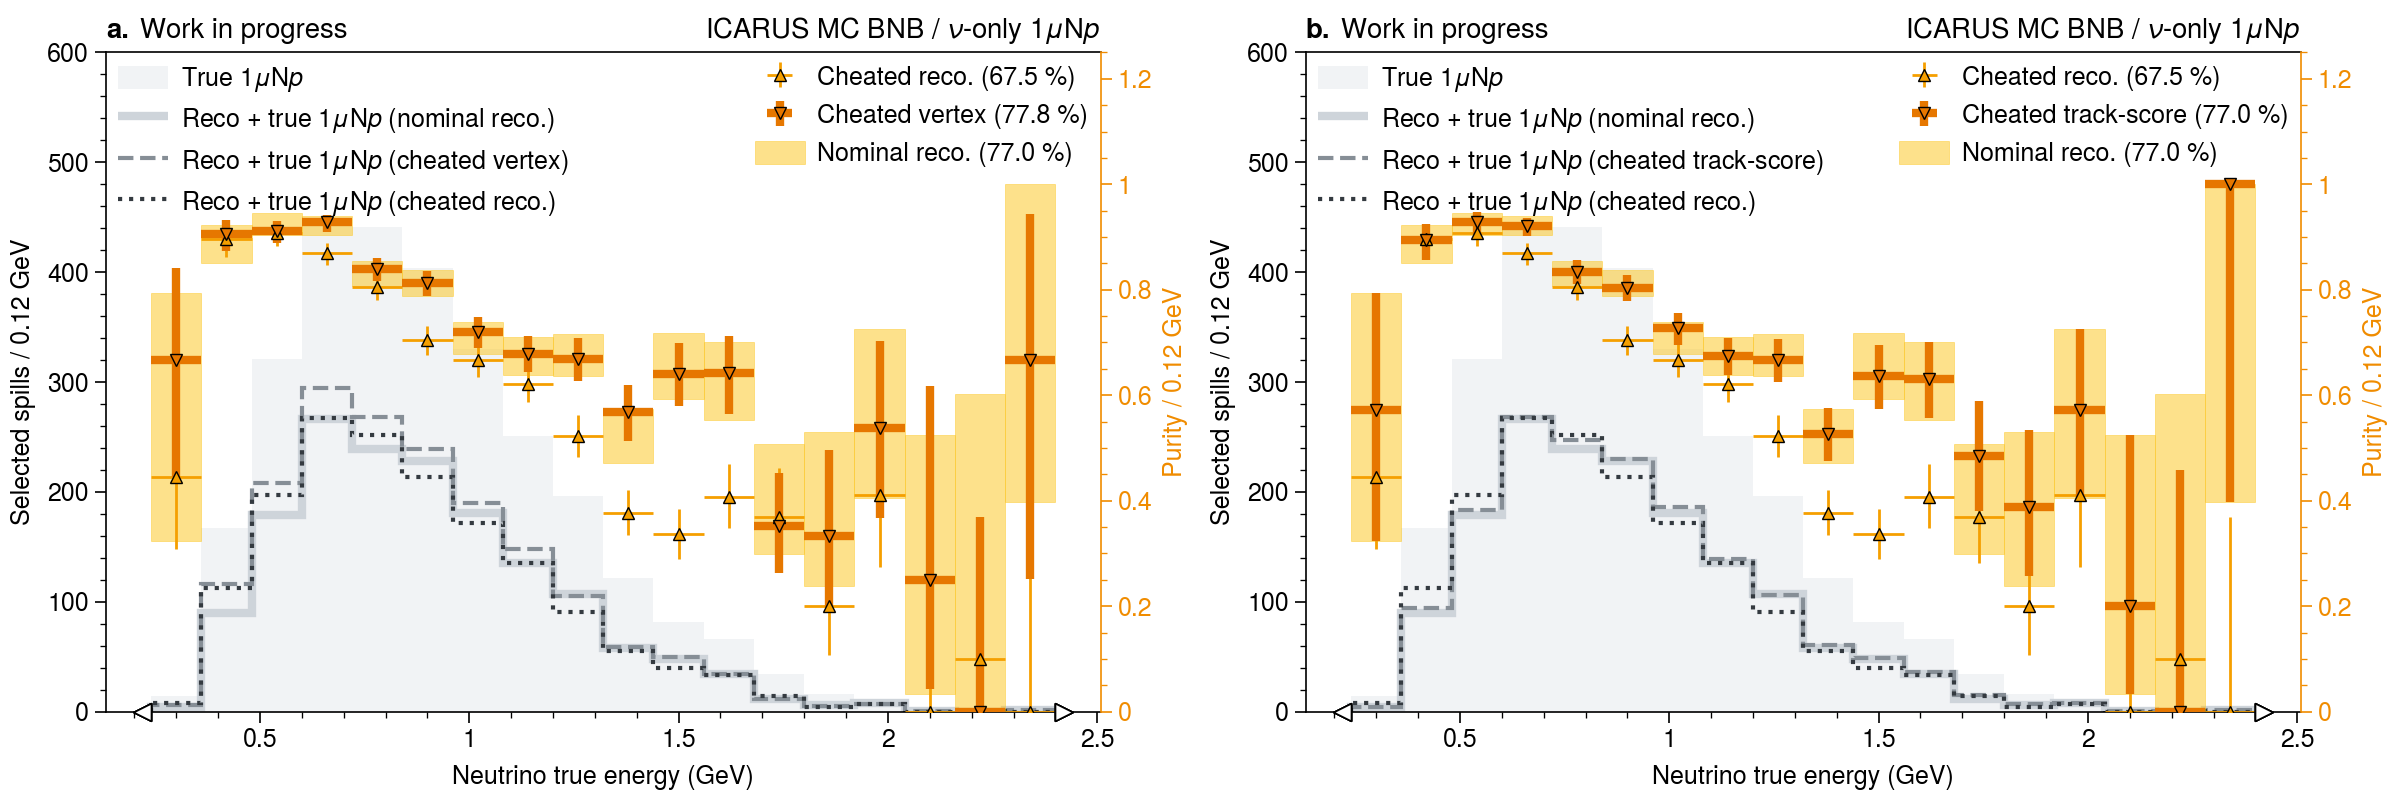

In [573]:

analysis_1u1p_vtx_mva = Analysis(data=uproot.open('efficiency_plot_1uNp.root:vtx_mva_only_cheating'), binning=energy_bins, )
analysis_1u1p_vtx_mva_integrated = Analysis(data=uproot.open('efficiency_plot_1uNp.root:vtx_mva_only_cheating'), binning=hist.axis.Regular(1, 0.24, 2.4), )

color='yellow'
variable = 'true_E'

variable_dict = {
    'true_E': 'true energy',
    'reco_E': 'reconstructed energy',
    'reco_pT': 'reconstructed $p_T$'
}

fig, axs = plot.subplots(
    width=12, height=4, ncols=2, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, 
    xlabel='Neutrino {} (GeV)'.format(variable_dict[variable]), abc='a.', abcloc='l',
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu\mathrm{N}p$', 
    ltitle='Work in progress'
)

ax1, ax2 = axs

cheated_dict = {
    'vtx': 'vertex',
    'mva': 'track-score'
}

for ax, cheated in zip(axs, ['vtx', 'mva']):

    reco_true, _, true = analysis_1u1p_vtx_mva.spectra('nominal', variable)
    hep.histplot(true, ax=ax, histtype='fill', color='gray1', label=r'True $1\mu\mathrm{N}p$')
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray4', lw=3, label=r'Reco + true $1\mu\mathrm{N}p$ (nominal reco.)')
    
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated_{}'.format(cheated), variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray6', lw=1.5, ls='--', label=r'Reco + true $1\mu\mathrm{{N}}p$ (cheated {})'.format(cheated_dict[cheated]))
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated', variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray8', lw=1.5, ls=':', label=r'Reco + true $1\mu\mathrm{N}p$ (cheated reco.)')
    
    ax.format(ymax=600)
    ax.legend(ncols=1, loc='ul')
    
    secax = ax.alty(color=f'{color}8', label=f'Purity / {energy_bins.widths[0]:.2f} GeV')
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.purity('cheated', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.purity('cheated', variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, 
                        color=f'{color}7', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Cheated reco. ({:.1f} %)'.format(integrated_efficiency[0]*100))
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.purity('cheated_{}'.format(cheated), variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.purity('cheated_{}'.format(cheated), variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, color=f'{color}9', fmt='v', markersize=4, 
                        mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Cheated {} ({:.1f} %)'.format(cheated_dict[cheated], integrated_efficiency[0]*100))
    
    efficiency, (low, high) = analysis_1u1p_vtx_mva.purity('nominal', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.purity('nominal', variable)
    eb = secax.bar(x=energy_bins.centers, height=high+low, bottom=efficiency-low, alpha=0.5, width=1,
                        color=f'{color}5', label='Nominal reco. ({:.1f} %)'.format(integrated_efficiency[0]*100), edgefix=True)
    
    secax.format(ymax=1.25)
    secax.legend(ncols=1, loc='ur')


fig.savefig('1uNp_purity_vtx_mva.pdf', bbox_inches='tight')


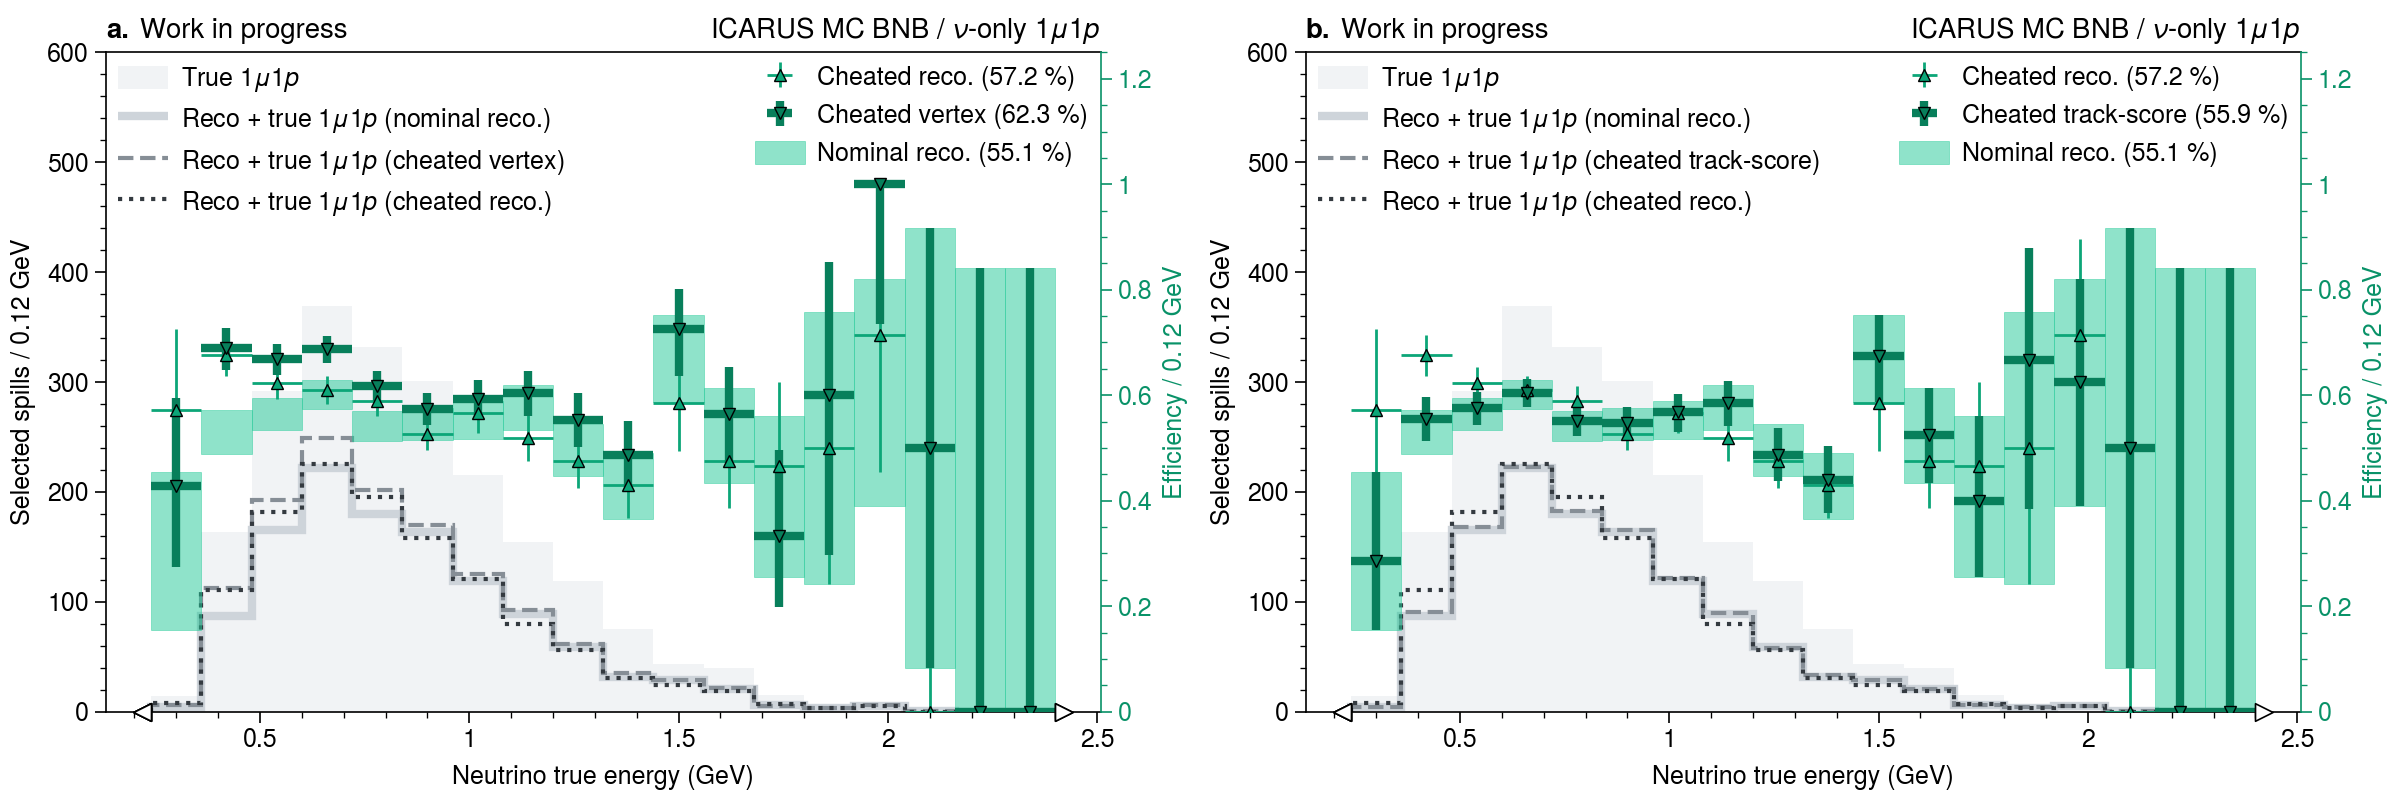

In [574]:
analysis_1u1p_vtx_mva = Analysis(data=uproot.open('efficiency_plot_1u1p.root:vtx_mva_only_cheating'), binning=energy_bins, )
analysis_1u1p_vtx_mva_integrated = Analysis(data=uproot.open('efficiency_plot_1u1p.root:vtx_mva_only_cheating'), binning=hist.axis.Regular(1, 0.24, 2.4), )

color='teal'
variable = 'true_E'

variable_dict = {
    'true_E': 'true energy',
    'reco_E': 'reconstructed energy',
    'reco_pT': 'reconstructed $p_T$'
}

fig, axs = plot.subplots(
    width=12, height=4, ncols=2, nrows=1, ylabel=f'Selected spills / {energy_bins.widths[0]:.2f} GeV',
    titlecolor='k', share=False, grid=False, 
    xlabel='Neutrino {} (GeV)'.format(variable_dict[variable]), abc='a.', abcloc='l',
    rtitle=r'ICARUS MC BNB / $\nu$-only $1\mu1p$', 
    ltitle='Work in progress'
)

ax1, ax2 = axs

cheated_dict = {
    'vtx': 'vertex',
    'mva': 'track-score'
}

for ax, cheated in zip(axs, ['vtx', 'mva']):

    reco_true, _, true = analysis_1u1p_vtx_mva.spectra('nominal', variable)
    hep.histplot(true, ax=ax, histtype='fill', color='gray1', label=r'True $1\mu1p$')
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray4', lw=3, label=r'Reco + true $1\mu1p$ (nominal reco.)')
    
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated_{}'.format(cheated), variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray6', lw=1.5, ls='--', label=r'Reco + true $1\mu1p$ (cheated {})'.format(cheated_dict[cheated]))
    reco_true, _, _ = analysis_1u1p_vtx_mva.spectra('cheated', variable)
    hep.histplot(reco_true, ax=ax, yerr=False, color='gray8', lw=1.5, ls=':', label=r'Reco + true $1\mu1p$ (cheated reco.)')
    
    ax.format(ymax=600)
    ax.legend(ncols=1, loc='ul')
    
    secax = ax.alty(color=f'{color}8', label=f'Efficiency / {energy_bins.widths[0]:.2f} GeV')
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.efficiency('cheated', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('cheated', variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, 
                        color=f'{color}7', fmt='^', markersize=4, mec='k', markeredgewidth=0.5, capsize=0, elinewidth=1, label='Cheated reco. ({:.1f} %)'.format(integrated_efficiency[0]*100))
    
    efficiency, uncertainty = analysis_1u1p_vtx_mva.efficiency('cheated_{}'.format(cheated), variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('cheated_{}'.format(cheated), variable)
    eb = secax.errorbar(energy_bins.centers, efficiency, yerr=uncertainty, xerr=energy_bins.widths[0]/2, color=f'{color}9', fmt='v', markersize=4, 
                        mec='k', markeredgewidth=0.5, capsize=0, elinewidth=3, label='Cheated {} ({:.1f} %)'.format(cheated_dict[cheated], integrated_efficiency[0]*100))
    
    efficiency, (low, high) = analysis_1u1p_vtx_mva.efficiency('nominal', variable)
    integrated_efficiency, _ = analysis_1u1p_vtx_mva_integrated.efficiency('nominal', variable)
    eb = secax.bar(x=energy_bins.centers, height=high+low, bottom=efficiency-low, alpha=0.5, width=1,
                        color=f'{color}5', label='Nominal reco. ({:.1f} %)'.format(integrated_efficiency[0]*100), edgefix=True)
    
    secax.format(ymax=1.25)
    secax.legend(ncols=1, loc='ur')

In [329]:
energy_bins.centers

array([0.3 , 0.42, 0.54, 0.66, 0.78, 0.9 , 1.02, 1.14, 1.26, 1.38, 1.5 ,
       1.62, 1.74, 1.86, 1.98, 2.1 , 2.22, 2.34])

In [331]:
efficiency+high, efficiency-low

(array([0.45459146, 0.57217031, 0.59550175, 0.62813985, 0.57083867,
        0.57500466, 0.58936371, 0.62027416, 0.54564315, 0.49106032,
        0.75182726, 0.61444124, 0.56147484, 0.75690962, 0.82107561,
        0.91724846, 0.84134475, 0.84134475]),
 array([0.1544844 , 0.48840597, 0.53416428, 0.57453306, 0.51323117,
        0.51438174, 0.51708291, 0.53448001, 0.44603016, 0.36443775,
        0.58772498, 0.43413515, 0.25458819, 0.24309038, 0.39005351,
        0.08275154, 0.        , 0.        ]))

In [363]:
energy_bins.widths

array([0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
       0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12])